# HOW TO START YOUR FIRST DATA SCIENCE PROJECT
## A PRACTICAL TUTORIAL FOR BEGINNERS
By Juan L. Kehoe  
https://www.districtdatalabs.com/how-to-start-your-first-data-science-project

##### Load libraries

In [1]:
import pandas as pd
import yellowbrick

## Step 1: Load data into a dataframe
Load the data from the “train.csv” file into a DataFrame.

In [2]:
addr1 = 'week-6/train.csv'
df = pd.read_csv(addr1)

## Step 2: Check the dimensions of the table
Display the dimensions of the file (so you’ll have a good idea the amount of data you are working with).

In [3]:
print(f"The table is {df.shape[0]} rows x {df.shape[1]} columns.")

The table is 891 rows x 12 columns.


## Step 3: Look at the data
Display the first 5 rows of data so you can see the column headings and the type of data for each column.

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


* **Survival** is represented as a *1* or *0*
* Missing data is represented as **NaN**.
* The **Survived** variable will be the *target* and the other variables will be the *features*.

## Step 4: Think about the data

### What might help predict survival?
* What do the variables look like? For example, are they numerical or categorical data. If they are numerical, what are their distribution; if they are categorical, how many are there in different categories?
* Are the numerical variables correlated?
* Are the distributions of numerical variables the same or different among survived and not survived? Is the survival rate different for different values? For example, were people more likely to survive if they were younger?
* Are there different survival rates in different categories? For example, did more women survive than men?

## Step 5: What type of variables are in the table?
Look at summary information about your data (total, mean, min, max, freq, unique, etc.).  Does this present any more questions for you?  Does it lead you to a conclusion yet? 

In [5]:
print("Describe Data:")
df.describe()

Describe Data:


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
print("Summarized Data:")
df.describe(include=['O'])

Summarized Data:


,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Karaic, Mr. Milan",male,CA. 2343,B96 B98,S
freq,1,577,7,4,644


## Step 6: Import visualization packages
Make some histograms of your data (“A picture is worth a thousand words!”)

In [7]:
# Load Libraries
import matplotlib.pyplot as plt

In [8]:
# Set up figure size
plt.rcParams['figure.figsize'] = (20, 10)

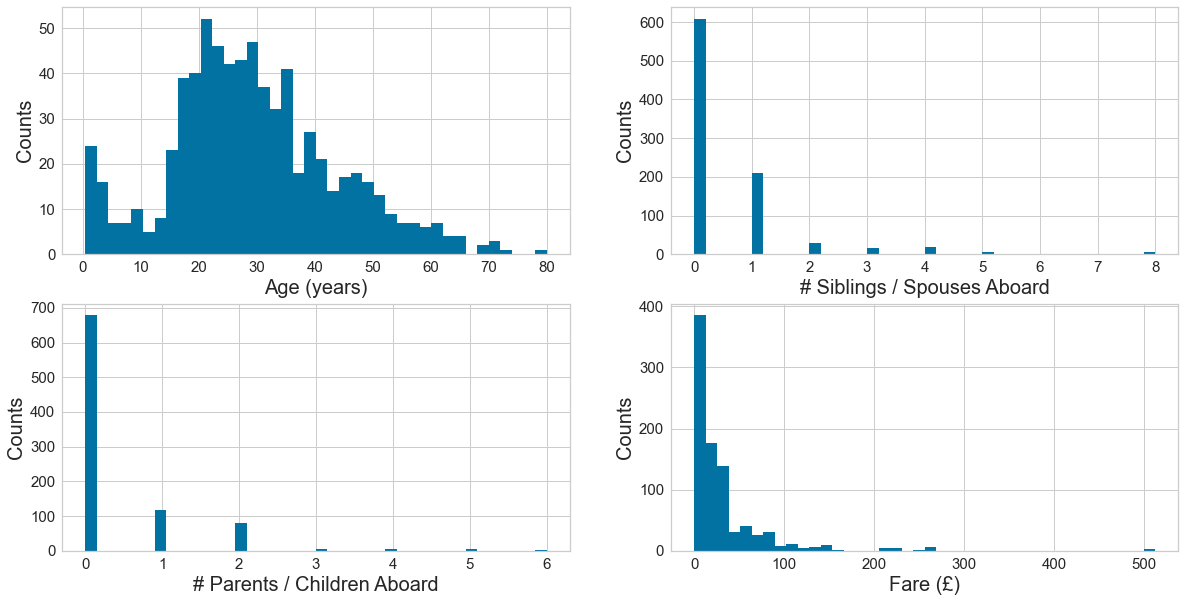

In [9]:
# Make subplots
fig, axes = plt.subplots(nrows=2, ncols=2)

# Specify the features of interest
num_features = ['Age', 'SibSp', 'Parch', 'Fare']
xAxes = ['Age (years)', '# Siblings / Spouses Aboard', 
         '# Parents / Children Aboard', 'Fare (£)']
yAxes = ['Counts'] * 4

# Draw histrograms
axes = axes.ravel()
for idx, ax in enumerate(axes):
    ax.hist(df[num_features[idx]].dropna(), bins=40)
    ax.set_xlabel(xAxes[idx], fontsize=20)
    ax.set_ylabel(yAxes[idx], fontsize=20)
    ax.tick_params(axis='both', labelsize=15)
    
plt.show()

idx: 0
ax:  [<AxesSubplot:> <AxesSubplot:>]
idx: 1
ax:  [<AxesSubplot:> <AxesSubplot:>]


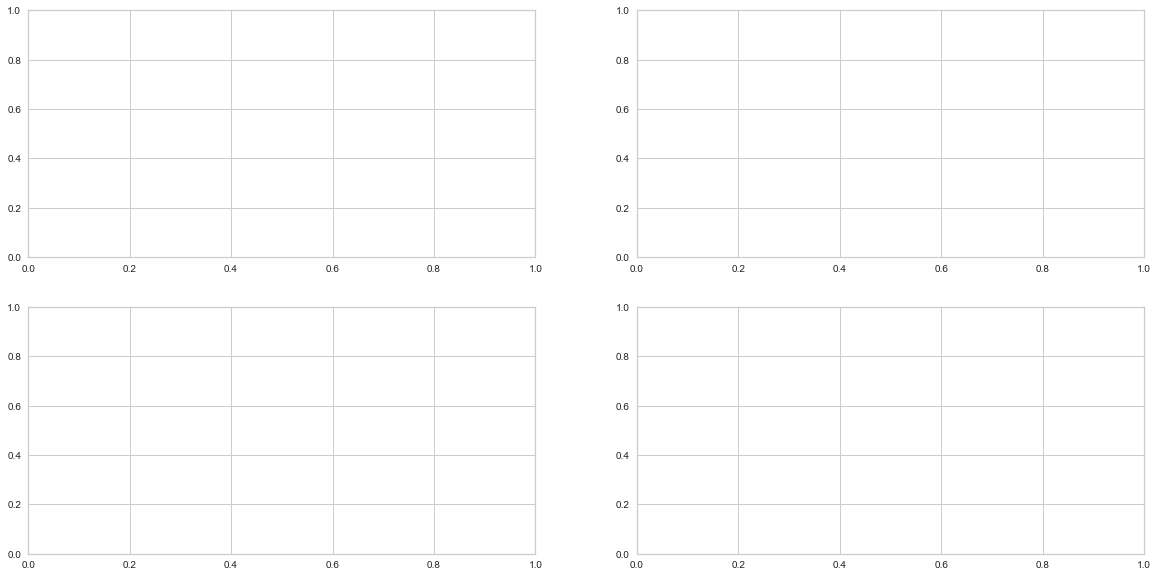

In [29]:
fig, axes = plt.subplots(nrows=2, ncols=2)
axes.ravel()
for idx, ax in enumerate(axes):
    print("idx:", idx)
    print("ax: ", ax)

* Most of the passengers are around 20 to 30 years old and don't have siblings or relatives with them. 
* A large amount of the tickets sold were less than \$50. 
* There are very few tickets sold where the fare was over \$500.

## Step 7: Barcharts
Make some bar charts for variables with only a few options.
* **Ticket** and **Cabin** have more than 100 variables so don’t do those!

In [10]:
# Set up figure size
%matplotlib inline
plt.rcParams['figure.figsize'] = (20, 10)

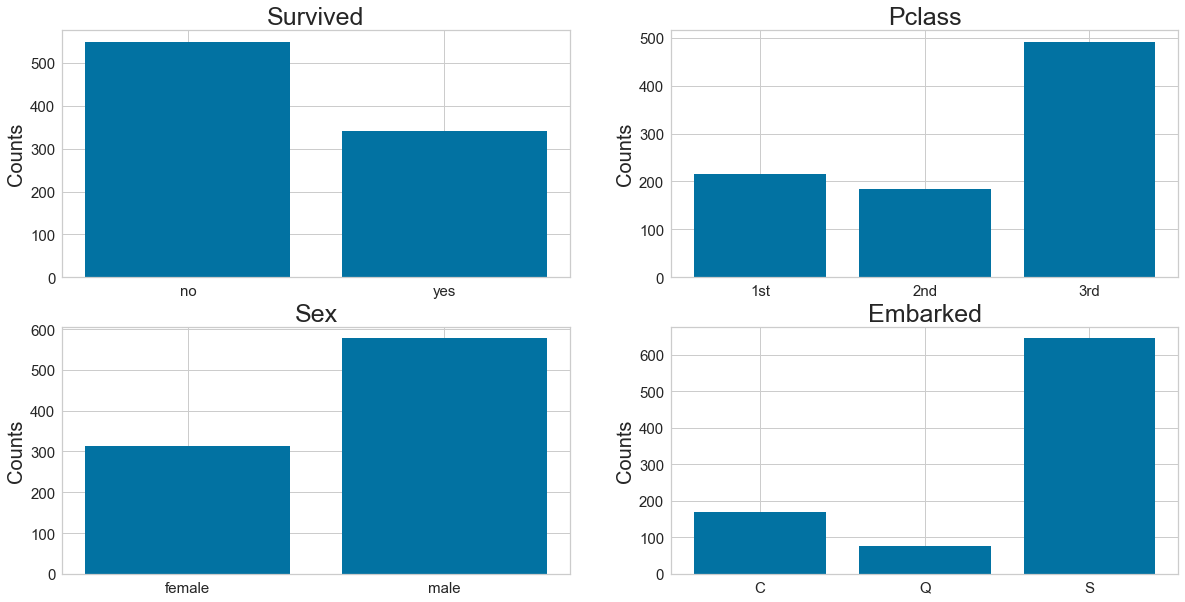

In [11]:
# Make subplots
fig, axes = plt.subplots(nrows=2, ncols=2)


## PLOT 1
# Get the data ready to feed into the visualizer
X_Survived = df.replace({'Survived': 
                         {1: 'yes', 0: 'no'}
                        }).groupby('Survived').size().reset_index(name='Counts')['Survived']
Y_Survived = df.replace({'Survived': 
                         {1: 'yes', 0: 'no'}
                        }).groupby('Survived').size().reset_index(name='Counts')['Counts']

# Make the 1st bar plot
axes[0, 0].bar(X_Survived, Y_Survived)
axes[0, 0].set_title('Survived', fontsize=25)
axes[0, 0].set_ylabel('Counts', fontsize=20)
axes[0, 0].tick_params(axis='both', labelsize=15)


## PLOT 2
# Get the data ready to feed into the visualizer
X_Pclass = df.replace({'Pclass': 
                       {1: '1st', 2: '2nd', 3: '3rd'}
                      }).groupby('Pclass').size().reset_index(name='Counts')['Pclass']
Y_Pclass = df.replace({'Pclass': 
                       {1: '1st', 2: '2nd', 3: '3rd'}
                      }).groupby('Pclass').size().reset_index(name='Counts')['Counts']

# Make the 2nd bar plot
axes[0, 1].bar(X_Pclass, Y_Pclass)
axes[0, 1].set_title('Pclass', fontsize=25)
axes[0, 1].set_ylabel('Counts', fontsize=20)
axes[0, 1].tick_params(axis='both', labelsize=15)


## PLOT 3
# Get the data ready to feed into the visualizer
X_Sex = df.groupby('Sex').size().reset_index(name='Counts')['Sex']
Y_Sex = df.groupby('Sex').size().reset_index(name='Counts')['Counts']

# Make the 3rd bar plot
axes[1, 0].bar(X_Sex, Y_Sex)
axes[1, 0].set_title('Sex', fontsize=25)
axes[1, 0].set_ylabel('Counts', fontsize=20)
axes[1, 0].tick_params(axis='both', labelsize=15)


## PLOT 4
# Get the data ready to feed into the visualizer
X_Embarked = df.groupby('Embarked').size().reset_index(name='Counts')['Embarked']
Y_Embarked = df.groupby('Embarked').size().reset_index(name='Counts')['Counts']

# Make the 4th bar plot
axes[1, 1].bar(X_Embarked, Y_Embarked)
axes[1, 1].set_title('Embarked', fontsize=25)
axes[1, 1].set_ylabel('Counts', fontsize=20)
axes[1, 1].tick_params(axis='both', labelsize=15)

plt.show()

## Step 8: Pearson Ranking
To see if the data is correlated, make some Pearson Ranking charts

In [12]:
# Load libraries
from yellowbrick.features import Rank2D  # Package for visualization of the correlation

In [13]:
# Set up figure size
%matplotlib inline
plt.rcParams['figure.figsize'] = (15, 7)

In [14]:
# Extract the numpy arrays from the DataFrame
# X = df[num_features].as_matrix()
# X = df[num_features].values()
X = df[num_features].values

<AxesSubplot:title={'center':'Pearson Ranking of 4 Features'}>

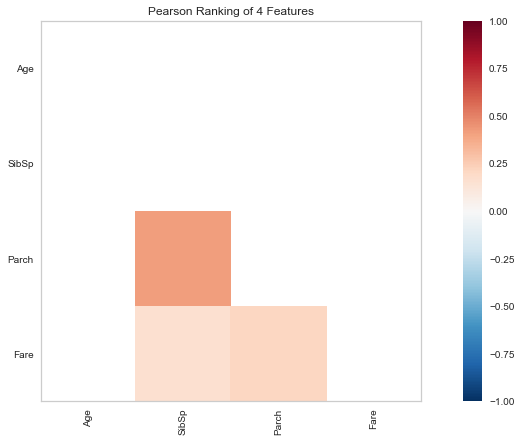

In [15]:
# Instantiate the visualizer with the Covariance ranking algorithm
visualizer = Rank2D(features=num_features, algorithm='pearson')
visualizer.fit(X)  # Fit the data to the visualizer
visualizer.transform(X)  # Transform the data
# visualizer.poof()  # Draw/show/poof the data
visualizer.poof(outpath='pcoords1.png') # Draw/show/poof the data
# plt.show()

The correlation between the variables is low (1 or -1 is high positive or high negative, 0 is low or no correlation)   
These results show there is “some” positive correlation but it’s not a high correlation.

## Step 9: Compare variables against survival
Use Parallel Coordinates visualization to compare the distributions of numerical variables between passengers that survived and those that did not survive.

In [16]:
# Load libraries
from yellowbrick.features import ParallelCoordinates

In [17]:
# Set up figure size
%matplotlib inline
plt.rcParams['figure.figsize'] = (15, 7)
plt.rcParams['font.size'] = 50

In [18]:
# Set up the color for yellowbrick visualizer
from yellowbrick.style import set_palette
set_palette('sns_bright')

In [19]:
# Specify features of interest and classes of the target
classes = ['Not-Survived', 'Survived']
num_features = ['Age', 'SibSp', 'Parch', 'Fare']

In [20]:
# Copy data to a new DataFrame
dfNorm = df.copy()

In [21]:
# Normalize data to a 0-1 range
for feature in num_features:
    dfNorm[feature] = (df[feature] - df[feature].mean(skipna=True)) / (df[feature].max(skipna=True) - df[feature].min(skipna=True))

In [22]:
# Extract the numpy arrays from the DataFrame
X = dfNorm[num_features].values
y = df['Survived'].values

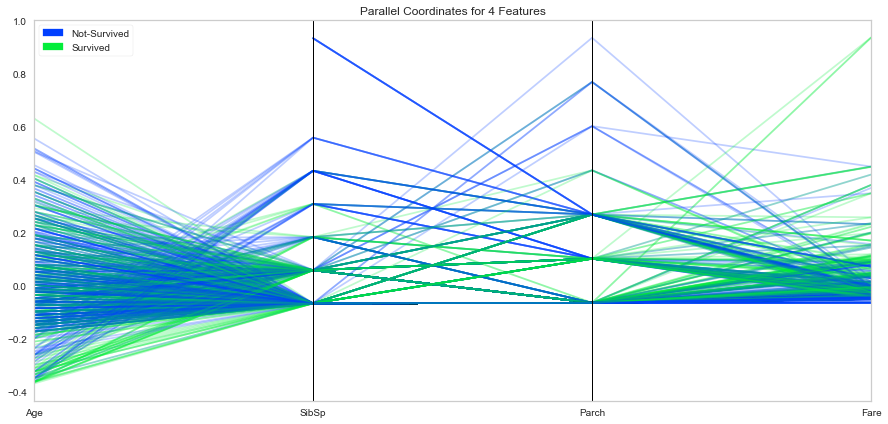

In [23]:
# Instantiate the visualizer
visualizer = ParallelCoordinates(classes=classes, features=num_features)

visualizer.fit(X, y)  # Fit the data to the visualizer
visualizer.transform(X)  # Transform the data
visualizer.poof(outpath='pcoords2.png')  # Draw/show/poof the data

plt.show()

Passengers traveling with siblings on the boat have a higher death rate and passengers who paid a higher fare had a higher survival rate.  

## Step 10: Stacked bar charts to to compare survival
Use Stack Bar Charts to compare passengers who survived to passengers who didn’t survive based on the other variables.

In [24]:
# Set up figure size
%matplotlib inline
plt.rcParams['figure.figsize'] = (20, 10)

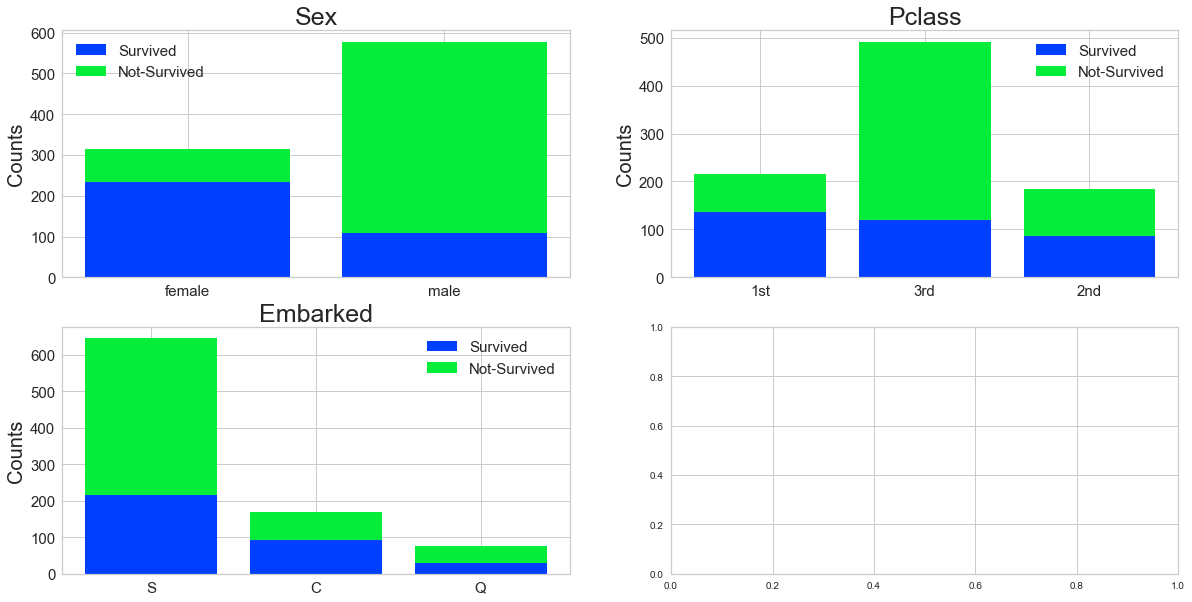

In [25]:
# Make subplots
fig, axes = plt.subplots(nrows=2, ncols=2)


## PLOT 1
# Get the data ready to feed into the visualizer
Sex_survived = df.replace({'Survived': 
                           {1: 'Survived', 0: 'Not-Survived'}
                          })[df['Survived']==1]['Sex'].value_counts()
Sex_not_survived = df.replace({'Survived': 
                               {1: 'Survived', 0: 'Not-Survived'}
                              })[df['Survived']==0]['Sex'].value_counts()
Sex_not_survived = Sex_not_survived.reindex(index=Sex_survived.index)

# Make the 1st bar plot
p1 = axes[0, 0].bar(Sex_survived.index, Sex_survived.values)
p2 = axes[0, 0].bar(Sex_not_survived.index, Sex_not_survived.values, bottom=Sex_survived.values)

axes[0, 0].set_title('Sex', fontsize=25)
axes[0, 0].set_ylabel('Counts', fontsize=20)
axes[0, 0].tick_params(axis='both', labelsize=15)
axes[0, 0].legend((p1[0], p2[0]), ('Survived', 'Not-Survived'), fontsize=15)


## PLOT 2
# Get the data ready to feed into the visualizer
Pclass_survived = df.replace({'Survived': {1: 'Survived', 0: 'Not-Survived'}
                             }).replace({'Pclass': {1: '1st', 2: '2nd', 3: '3rd'}
                                        })[df['Survived']==1]['Pclass'].value_counts()
Pclass_not_survived = df.replace({'Survived': {1: 'Survived', 0: 'Not-Survived'}
                                 }).replace({'Pclass': {1: '1st', 2: '2nd', 3: '3rd'}
                                            })[df['Survived']==0]['Pclass'].value_counts()
Pclass_not_survived = Pclass_not_survived.reindex(index=Pclass_survived.index)

# Make the 2nd bar plot
p3 = axes[0, 1].bar(Pclass_survived.index, Pclass_survived.values)
p4 = axes[0, 1].bar(Pclass_not_survived.index, Pclass_not_survived.values, bottom=Pclass_survived.values)

axes[0, 1].set_title('Pclass', fontsize=25)
axes[0, 1].set_ylabel('Counts', fontsize=20)
axes[0, 1].tick_params(axis='both', labelsize=15)
axes[0, 1].legend((p1[0], p2[0]), ('Survived', 'Not-Survived'), fontsize=15)


## PLOT 3
# Get the data ready to feed into the visualizer
Embarked_survived = df.replace({'Survived': {1: 'Survived', 0: 'Not-Survived'}}
                              )[df['Survived']==1]['Embarked'].value_counts()
Embarked_not_survived = df.replace({'Survived': {1: 'Survived', 0: 'Not-Survived'}}
                                  )[df['Survived']==0]['Embarked'].value_counts()
Embarked_not_survived = Embarked_not_survived.reindex(index=Embarked_survived.index)

# Make the 3rd bar plot
p5 = axes[1, 0].bar(Embarked_survived.index, Embarked_survived.values)
p6 = axes[1, 0].bar(Embarked_not_survived.index, Embarked_not_survived.values, bottom=Embarked_survived.values)

axes[1, 0].set_title('Embarked', fontsize=25)
axes[1, 0].set_ylabel('Counts', fontsize=20)
axes[1, 0].tick_params(axis='both', labelsize=15)
axes[1, 0].legend((p1[0], p2[0]), ('Survived', 'Not-Survived'), fontsize=15)

plt.show()

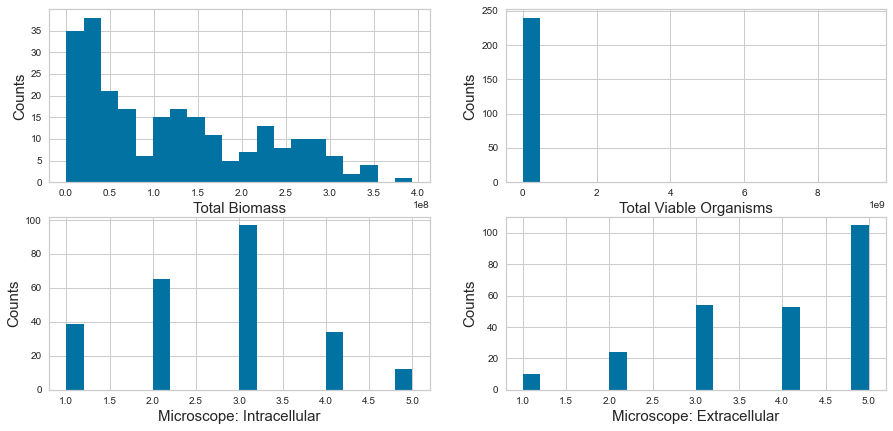

In [172]:
# Specify the features of interest
num_features = ['MPbio_TotCt', 'MPtvo_TotCt', 'Intra_Code', 'Extra_Code']
xAxes = ['Total Biomass', 'Total Viable Organisms', 'Microscope: Intracellular', 'Microscope: Extracellular']
yAxes = ['Counts'] * 4

make_histograms()

It is now time to start using everything you have learned in the first half of this class. The project for this course is to develop your own original analysis case study, and you will be working through and updating this project for the remainder of the term. The work you are doing on the Titanic case study in parallel is a guide for your original project, but you will need to adapt the analysis for your data/project.

The first step is coming up with an idea – arguably one of the hardest steps! Identify an original business problem for your project. There are lots of ideas available online through Kaggle and other sources, but your idea should have a unique spin on it. The second step is locating your data. This can come from a variety of sources, e.g., Kaggle, your job, a website, API, etc. Feel free to reach out to your instructor if you are not sure if your idea and data are suitable.

Begin Milestone 1 with a 250-500-word narrative describing an original idea for an analysis/model building business problem. Then, do a graphical analysis creating a minimum of four graphs. Label your graphs appropriately and explain/analyze the information provided by each graph. Keep in mind that your analysis may look very different from the Titanic tutorial graphical analysis. Write a short overview/conclusion of the insights gained from your graphical analysis.

As a reminder – Teams is a great place to discuss your project with your peers. Feel free to solicit feedback/input (without creating a group project!) and collaborate on your projects with your peers.  
Each milestone will build on top of each other, so make sure you do not fall behind.  
Submit Milestone 1 as a PDF or Jupyter Notebook, along with any applicable code to the submission link.

## 1) Begin Milestone 1 with a 250-500-word narrative describing an original idea for an analysis/model building business problem. 

## 2) Then, do a graphical analysis creating a minimum of four graphs.
Label your graphs appropriately and explain/analyze the information provided by each graph. Keep in mind that your analysis may look very different from the Titanic tutorial graphical analysis.

## 3) Write a short overview/conclusion of the insights gained from your graphical analysis.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data = pd.read_excel('Compiled_Lawsonia.xlsx')

In [3]:
data.shape

(465, 39)

In [4]:
save = data.copy()

In [5]:
data.head()

,Batch,Vessel,DPI,Date,Time,Temp_C,Agitation,DO_pct,pH_online,pH_offline,...,Micro_Comments,Intra_Code,Extra_Code,ELISA_KZO,ELISA_LNK,Live_Titer,VCD_OD,RNA,gDNA/1mL,Antifoam
0,369697PV,Flasks,3,2019-07-12,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,369697PV,5L BLU,M,2019-07-12,09:25:00,36.0,40.0,7.37,7.035,6.783,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,369697PV,5L BLU,0,2019-07-12,10:53:00,35.8,40.0,15.39,6.983,7.118,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,369697PV,5L BLU,1,2019-07-13,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,369697PV,5L BLU,2,2019-07-14,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
data.dtypes

Batch                     object
Vessel                    object
DPI                       object
Date              datetime64[ns]
Time                      object
Temp_C                   float64
Agitation                float64
DO_pct                   float64
pH_online                float64
pH_offline               float64
O₂_%sat                  float64
CO₂_%sat                 float64
L_Glut                   float64
Gluc                     float64
Lact                     float64
Ammon                    float64
Nuc_NonVi                 object
Nuc_TotCt                float64
Nuc_LiveCt               float64
Nuc_Viab                 float64
MPbio_Blank              float64
MPbio_Area               float64
MPbio_TotCt              float64
MPtvo_Blank              float64
MPtvo_Area               float64
MPtvo_TotCt              float64
Intra_Ct                 float64
Micro_Intra               object
Micro_Extra               object
Micro_Comments            object
Intra_Code

In [7]:
data['DPI'].isnull().any()

True

In [8]:
# Check each column for NaNs
pd.isnull(data).any()

Batch             False
Vessel            False
DPI                True
Date               True
Time               True
Temp_C             True
Agitation          True
DO_pct             True
pH_online          True
pH_offline         True
O₂_%sat            True
CO₂_%sat           True
L_Glut             True
Gluc               True
Lact               True
Ammon              True
Nuc_NonVi          True
Nuc_TotCt          True
Nuc_LiveCt         True
Nuc_Viab           True
MPbio_Blank        True
MPbio_Area         True
MPbio_TotCt        True
MPtvo_Blank        True
MPtvo_Area         True
MPtvo_TotCt        True
Intra_Ct           True
Micro_Intra        True
Micro_Extra        True
Micro_Comments     True
Intra_Code         True
Extra_Code         True
ELISA_KZO          True
ELISA_LNK          True
Live_Titer         True
VCD_OD             True
RNA                True
gDNA/1mL           True
Antifoam           True
dtype: bool

In [9]:
# data[data['DPI'].notnull()]

In [10]:
data = data[data['DPI'].notnull()]

In [11]:
data.shape

(464, 39)

In [12]:
data.columns

Index(['Batch', 'Vessel', 'DPI', 'Date', 'Time', 'Temp_C', 'Agitation',
       'DO_pct', 'pH_online', 'pH_offline', 'O₂_%sat', 'CO₂_%sat', 'L_Glut',
       'Gluc', 'Lact', 'Ammon', 'Nuc_NonVi', 'Nuc_TotCt', 'Nuc_LiveCt',
       'Nuc_Viab', 'MPbio_Blank', 'MPbio_Area', 'MPbio_TotCt', 'MPtvo_Blank',
       'MPtvo_Area', 'MPtvo_TotCt', 'Intra_Ct', 'Micro_Intra', 'Micro_Extra',
       'Micro_Comments', 'Intra_Code', 'Extra_Code', 'ELISA_KZO', 'ELISA_LNK',
       'Live_Titer', 'VCD_OD', 'RNA', 'gDNA/1mL', 'Antifoam'],
      dtype='object')

In [13]:
data.iloc[0]

Batch                        369697PV
Vessel                         Flasks
DPI                                 3
Date              2019-07-12 00:00:00
Time                              NaN
Temp_C                            NaN
Agitation                         NaN
DO_pct                            NaN
pH_online                         NaN
pH_offline                        NaN
O₂_%sat                           NaN
CO₂_%sat                          NaN
L_Glut                            NaN
Gluc                              NaN
Lact                              NaN
Ammon                             NaN
Nuc_NonVi                         <5k
Nuc_TotCt                      648000
Nuc_LiveCt                     643000
Nuc_Viab                        0.992
MPbio_Blank                      3596
MPbio_Area                      55686
MPbio_TotCt                   1.3e+07
MPtvo_Blank                        21
MPtvo_Area                      10645
MPtvo_TotCt                  2.66e+06
Intra_Ct    

In [14]:
data = data[data.DPI!='M']

In [15]:
data['DPI'] = data['DPI'].astype(float)

In [16]:
data.Nuc_NonVi = data.Nuc_NonVi.replace('<5k', 5000/2) # Replacing with value 1/2 of lower limit

In [17]:
data.Micro_Intra.unique()

array([nan, 'Light, 1+', 'Some, 2+', 'Heavy, 3+', 'Very Light, <1+',
       'Very Heavy, 4+'], dtype=object)

In [18]:
dict = {'Very Light, <1+': 1, 'Light, 1+': 2, 'Some, 2+': 3, 'Heavy, 3+': 4, 'Very Heavy, 4+': 5}

Add new columns coded for ordered categorical value:

In [19]:
data['Intra_Code'] = data['Micro_Intra'].map(dict)

In [20]:
data['Extra_Code'] = data['Micro_Extra'].map(dict)

In [21]:
round(data.describe(), 2)

,DPI,Temp_C,Agitation,DO_pct,pH_online,pH_offline,O₂_%sat,CO₂_%sat,L_Glut,Gluc,...,Intra_Ct,Intra_Code,Extra_Code,ELISA_KZO,ELISA_LNK,Live_Titer,VCD_OD,RNA,gDNA/1mL,Antifoam
count,422.00,339.00,339.00,339.00,339.00,262.00,241.00,246.00,195.00,249.00,...,76.00,247.00,246.00,82.00,21.00,5.00,22.00,47.00,5.600000e+01,7.0
mean,4.95,35.99,49.73,6.42,7.05,7.05,1.33,0.08,0.88,3.89,...,15.89,2.66,3.89,9263.34,6926.57,4.53,1.11,15827.86,1.960579e+08,1.0
std,3.70,0.11,10.18,3.23,0.04,0.09,9.05,0.13,0.85,0.70,...,23.29,1.05,1.18,3295.63,2853.12,0.71,1.02,22378.75,1.507412e+08,0.0
min,0.00,34.78,40.00,0.16,6.61,6.66,0.03,0.01,0.00,1.08,...,0.00,1.00,1.00,1630.00,3156.00,3.50,-0.40,170.00,2.545546e+06,1.0
25%,2.00,36.00,42.00,5.59,7.05,7.01,0.38,0.06,0.05,3.60,...,2.75,2.00,3.00,6617.25,4889.00,4.50,0.15,1478.96,7.661384e+07,1.0
50%,4.00,36.00,48.90,5.98,7.05,7.05,0.48,0.07,0.66,4.12,...,7.50,3.00,4.00,9670.25,5549.00,4.50,1.25,7378.63,1.359994e+08,1.0
75%,7.00,36.00,49.20,6.30,7.06,7.09,0.61,0.09,1.52,4.39,...,20.00,3.00,5.00,11124.50,9758.00,4.65,2.09,23748.48,2.879057e+08,1.0
max,15.00,36.40,67.30,41.74,7.14,7.52,100.00,1.90,3.27,4.90,...,127.00,5.00,5.00,17020.00,11965.00,5.50,2.58,103762.66,6.374318e+08,1.0


In [22]:
data.describe(include=['O'])

,Batch,Vessel,Time,Micro_Intra,Micro_Extra,Micro_Comments
count,422,422,341,247,247,248
unique,12,5,162,5,6,23
top,484263PV,1000L SUB,09:00:00,"Some, 2+","Very Heavy, 4+",None
freq,42,132,7,97,105,225


Remove VCD_OD data for 471341PV

In [23]:
import numpy as np

In [24]:
data.loc[(data.Batch == '471341PV'), 'VCD_OD'] = np.nan

In [25]:
keepCols = ['Batch', 'Vessel', 'DPI', 
       'DO_pct', 'pH_online', 'pH_offline', 'O₂_%sat', 'CO₂_%sat', 'L_Glut',
       'Gluc', 'Lact', 'Ammon', 'Nuc_NonVi', 'Nuc_TotCt', 'Nuc_LiveCt',
       'Nuc_Viab', 'MPbio_TotCt',
       'MPtvo_TotCt', 'Intra_Ct', 'Micro_Intra', 'Micro_Extra',
       'Intra_Code', 'Extra_Code', 'ELISA_KZO',
       'Live_Titer', 'VCD_OD', 'RNA', 'gDNA/1mL', 'Antifoam']

In [26]:
newDF = data[keepCols]

In [27]:
newDF.head()

,Batch,Vessel,DPI,DO_pct,pH_online,pH_offline,O₂_%sat,CO₂_%sat,L_Glut,Gluc,...,Micro_Intra,Micro_Extra,Intra_Code,Extra_Code,ELISA_KZO,Live_Titer,VCD_OD,RNA,gDNA/1mL,Antifoam
0,369697PV,Flasks,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,369697PV,5L BLU,0.0,15.39,6.983,7.118,0.586,0.084,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,369697PV,5L BLU,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,369697PV,5L BLU,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,369697PV,5L BLU,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
newDF.iloc[:,3:]

,DO_pct,pH_online,pH_offline,O₂_%sat,CO₂_%sat,L_Glut,Gluc,Lact,Ammon,Nuc_NonVi,...,Micro_Intra,Micro_Extra,Intra_Code,Extra_Code,ELISA_KZO,Live_Titer,VCD_OD,RNA,gDNA/1mL,Antifoam
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2500.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,15.39,6.983,7.118,0.586,0.084,NaN,NaN,NaN,0.57,2500.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
460,5.44,7.050,6.951,0.390,0.069,0.0,2.91,0.24,5.90,90000.0,...,"Some, 2+","Very Heavy, 4+",3.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN
461,6.07,7.050,7.103,0.480,0.044,0.0,2.67,0.30,5.91,69000.0,...,"Some, 2+","Very Heavy, 4+",3.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN
462,6.14,7.050,7.072,0.384,0.047,0.0,2.54,0.25,5.93,124000.0,...,"Some, 2+","Very Heavy, 4+",3.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN
463,5.73,7.050,7.024,0.386,0.055,0.0,2.44,0.19,5.75,192000.0,...,"Some, 2+","Very Heavy, 4+",3.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
newDF.iloc[2]

Batch          369697PV
Vessel           5L BLU
DPI                   1
DO_pct              NaN
pH_online           NaN
pH_offline          NaN
O₂_%sat             NaN
CO₂_%sat            NaN
L_Glut              NaN
Gluc                NaN
Lact                NaN
Ammon               NaN
Nuc_NonVi           NaN
Nuc_TotCt           NaN
Nuc_LiveCt          NaN
Nuc_Viab            NaN
MPbio_TotCt         NaN
MPtvo_TotCt         NaN
Intra_Ct            NaN
Micro_Intra         NaN
Micro_Extra         NaN
Intra_Code          NaN
Extra_Code          NaN
ELISA_KZO           NaN
Live_Titer          NaN
VCD_OD              NaN
RNA                 NaN
gDNA/1mL            NaN
Antifoam            NaN
Name: 3, dtype: object

In [30]:
testDF = newDF.copy()

In [31]:
testDF.shape

(422, 29)

In [32]:
# testDF.dropna(thresh=20)

In [33]:
# testDF.dropna(thresh=1)

#### Remove rows without data

In [34]:
colList = testDF.columns[3:]

In [35]:
testDF.dropna(axis=0, subset=colList, how="all", inplace=True)

In [36]:
testDF.loc[0]

Batch          369697PV
Vessel           Flasks
DPI                   3
DO_pct              NaN
pH_online           NaN
pH_offline          NaN
O₂_%sat             NaN
CO₂_%sat            NaN
L_Glut              NaN
Gluc                NaN
Lact                NaN
Ammon               NaN
Nuc_NonVi          2500
Nuc_TotCt        648000
Nuc_LiveCt       643000
Nuc_Viab          0.992
MPbio_TotCt     1.3e+07
MPtvo_TotCt    2.66e+06
Intra_Ct            NaN
Micro_Intra         NaN
Micro_Extra         NaN
Intra_Code          NaN
Extra_Code          NaN
ELISA_KZO           NaN
Live_Titer          NaN
VCD_OD              NaN
RNA                 NaN
gDNA/1mL            NaN
Antifoam            NaN
Name: 0, dtype: object

In [37]:
testDF.shape

(352, 29)

In [38]:
y = data.MPbio_TotCt

In [39]:
x = data.DPI

In [40]:
import numpy as np

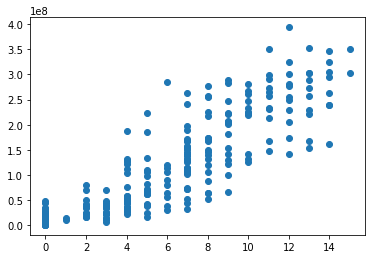

In [41]:
plt.scatter(x, y)

In [42]:
# plt.scatter(x, y)
# m, b = np.polyfit(x, y, 1)
# plt.plot(x, m*x+b)

In [43]:
import seaborn as sns

<AxesSubplot:xlabel='DPI', ylabel='MPbio_TotCt'>

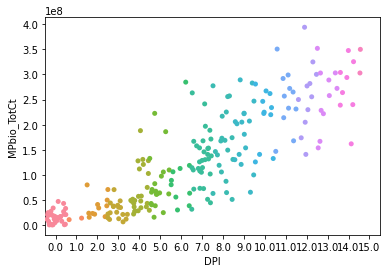

In [44]:
sns.stripplot(x="DPI", y="MPbio_TotCt", data=data, jitter=0.5)

<AxesSubplot:xlabel='DPI', ylabel='MPbio_TotCt'>

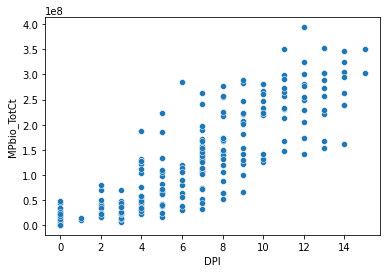

In [45]:
sns.scatterplot(x="DPI", y="MPbio_TotCt", data=data, x_jitter=0.5)

In [46]:
import statsmodels.api as sm

In [47]:
df = data.copy()

In [48]:
# df = df.astype('float')

In [49]:
# for i in df.columns:
#     if not pd.isnull(df[i]).any():
#         for j in df.columns:
#             if j != i and not pd.isnull(df[j]).any():
#                 model = sm.OLS(df[j], df[i]).fit()
#                 if model.rsquared > 0.40:
#                     df.plot.scatter(x=i, y=j)
#                     sns.regplot(x=i, y=j, data=df)
#                     fig = plt.gcf()
# #                     fig.suptitle("")

In [50]:
df[pd.isnull(df.DPI)]#.any()

,Batch,Vessel,DPI,Date,Time,Temp_C,Agitation,DO_pct,pH_online,pH_offline,...,Micro_Comments,Intra_Code,Extra_Code,ELISA_KZO,ELISA_LNK,Live_Titer,VCD_OD,RNA,gDNA/1mL,Antifoam


In [51]:
df = df[df['DPI'].notnull()]

In [52]:
df.iloc[196:203]

,Batch,Vessel,DPI,Date,Time,Temp_C,Agitation,DO_pct,pH_online,pH_offline,...,Micro_Comments,Intra_Code,Extra_Code,ELISA_KZO,ELISA_LNK,Live_Titer,VCD_OD,RNA,gDNA/1mL,Antifoam
215,458161PV,50L BLU,6.0,2020-09-08,08:54:00,36.01,42.0,5.98,7.05,7.048,...,More intra than previous day,3.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
216,458161PV,50L BLU,7.0,2020-09-09,09:09:00,36.00,42.0,5.86,7.05,7.043,...,None,3.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
217,458161PV,50L BLU,8.0,2020-09-10,08:39:00,36.00,42.0,6.06,7.05,7.000,...,None,3.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
220,458161PV,250L SUB,0.0,2020-09-10,09:31:00,35.91,67.0,3.96,7.06,7.011,...,None,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
221,458161PV,250L SUB,1.0,2020-09-11,14:07:00,36.01,66.9,4.63,7.06,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
222,458161PV,250L SUB,2.0,2020-09-12,10:02:00,35.98,66.9,6.19,7.06,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
223,458161PV,250L SUB,3.0,2020-09-13,09:08:00,36.01,66.9,5.92,7.06,7.324,...,None,3.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [53]:
len(df)

422

In [54]:
# df[df['MPbio_TotCt'].isnull()]

In [55]:
MPBdf = df[pd.notnull(df.MPbio_TotCt)]
# df['MPbio_TotCt'].isnull()

In [56]:
# data.plot.scatter(x, y)

<AxesSubplot:xlabel='DPI', ylabel='MPbio_TotCt'>

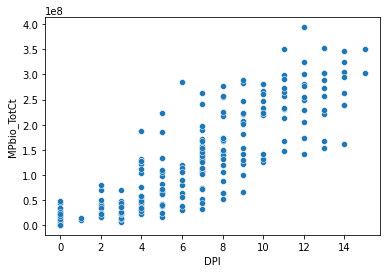

In [57]:
sns.scatterplot(x="DPI", y="MPbio_TotCt", data=MPBdf)

In [58]:
MPBdf['DPI'] = MPBdf['DPI'].astype(float)

<ipython-input-58-90e4d5f0d662>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  MPBdf['DPI'] = MPBdf['DPI'].astype(float)


<AxesSubplot:xlabel='DPI', ylabel='MPbio_TotCt'>

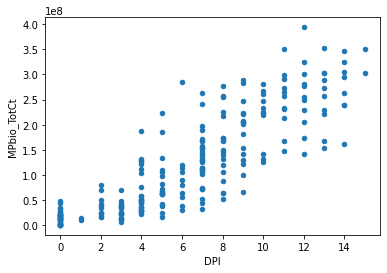

In [59]:
MPBdf.plot.scatter(x='DPI', y='MPbio_TotCt')

<AxesSubplot:xlabel='DPI', ylabel='MPbio_TotCt'>

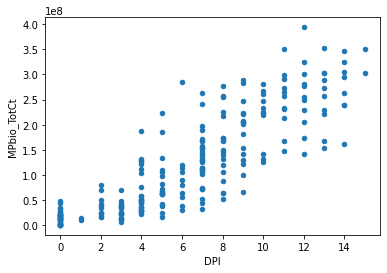

In [60]:
df.plot.scatter(x='DPI', y='MPbio_TotCt')

In [61]:
MPBdf.dtypes

Batch                     object
Vessel                    object
DPI                      float64
Date              datetime64[ns]
Time                      object
Temp_C                   float64
Agitation                float64
DO_pct                   float64
pH_online                float64
pH_offline               float64
O₂_%sat                  float64
CO₂_%sat                 float64
L_Glut                   float64
Gluc                     float64
Lact                     float64
Ammon                    float64
Nuc_NonVi                float64
Nuc_TotCt                float64
Nuc_LiveCt               float64
Nuc_Viab                 float64
MPbio_Blank              float64
MPbio_Area               float64
MPbio_TotCt              float64
MPtvo_Blank              float64
MPtvo_Area               float64
MPtvo_TotCt              float64
Intra_Ct                 float64
Micro_Intra               object
Micro_Extra               object
Micro_Comments            object
Intra_Code

<AxesSubplot:xlabel='DPI', ylabel='MPbio_TotCt'>

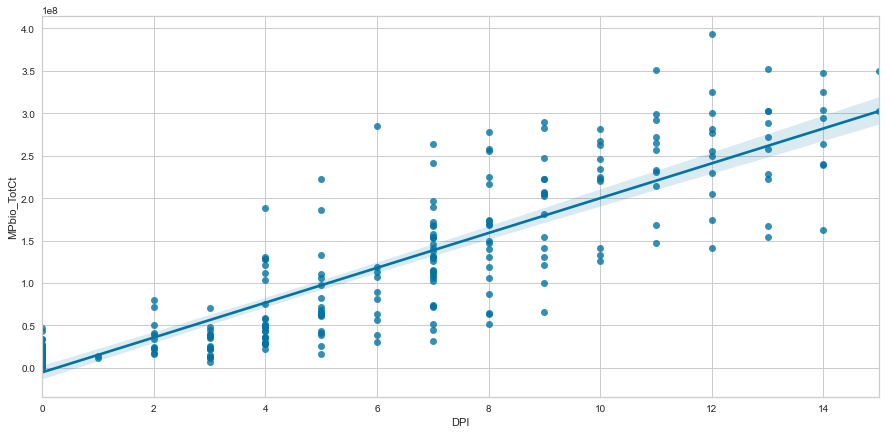

In [183]:
sns.regplot(x="DPI", y="MPbio_TotCt", data=MPBdf)#, dropna=True)

In [63]:
# df.dtypes

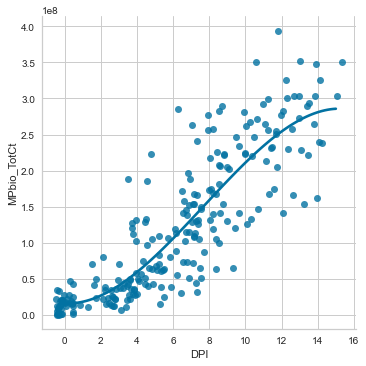

In [187]:
sns.lmplot(x="DPI", y="MPbio_TotCt", data=MPBdf, x_jitter=0.5, order=3, ci=None)

In [65]:
df['DPI'] = df['DPI'].astype(float)

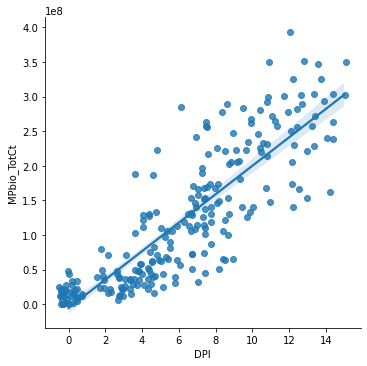

In [66]:
sns.lmplot(x="DPI", y="MPbio_TotCt", data=df, x_jitter=0.5, order=1)# , ci=None)

<AxesSubplot:xlabel='DPI', ylabel='MPbio_TotCt'>

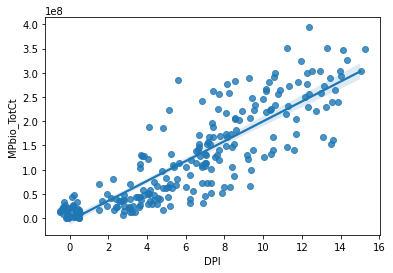

In [67]:
sns.regplot(x="DPI", y="MPbio_TotCt", data=df, x_jitter=0.5)

<AxesSubplot:xlabel='DPI', ylabel='MPbio_TotCt'>

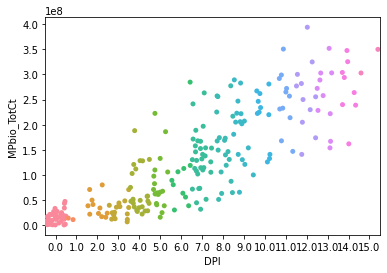

In [68]:
sns.stripplot(x="DPI", y="MPbio_TotCt", data=df, jitter=0.5)

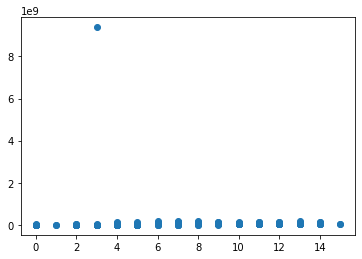

In [69]:
y = data.MPtvo_TotCt
plt.scatter(x, y)

#### Remove or fix that crazy outlier

In [70]:
data[data.MPtvo_TotCt>8e9]

,Batch,Vessel,DPI,Date,Time,Temp_C,Agitation,DO_pct,pH_online,pH_offline,...,Micro_Comments,Intra_Code,Extra_Code,ELISA_KZO,ELISA_LNK,Live_Titer,VCD_OD,RNA,gDNA/1mL,Antifoam
179,457597PV,50L BLU,3.0,2020-08-17,09:25:00,36.0,42.0,5.59,7.05,6.983,...,None,2.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [71]:
data[data.MPtvo_TotCt>8e9].iloc[0]

Batch                        457597PV
Vessel                        50L BLU
DPI                                 3
Date              2020-08-17 00:00:00
Time                         09:25:00
Temp_C                             36
Agitation                          42
DO_pct                           5.59
pH_online                        7.05
pH_offline                      6.983
O₂_%sat                         0.491
CO₂_%sat                        0.092
L_Glut                           0.58
Gluc                             4.21
Lact                             0.07
Ammon                             NaN
Nuc_NonVi                        2500
Nuc_TotCt                       57000
Nuc_LiveCt                      52000
Nuc_Viab                     0.912281
MPbio_Blank                       413
MPbio_Area                     149110
MPbio_TotCt                  3.72e+07
MPtvo_Blank                        11
MPtvo_Area                      39381
MPtvo_TotCt                 9.384e+09
Intra_Ct    

In [72]:
data[data.MPtvo_TotCt>8e9].iloc[0,25]

9384000000.0

##### 457597PV, 50L BLU, D3, TVO should be 9.84E+06, not 9.384E+09

In [73]:
# data[data.MPtvo_TotCt>8e9].iloc[0,25] = 9.84e6

In [74]:
# data.loc[179, 'MPtvo_TotCt']

In [75]:
# data.loc[179, 'MPtvo_TotCt'] = 9.84e6

In [76]:
data.reindex()

,Batch,Vessel,DPI,Date,Time,Temp_C,Agitation,DO_pct,pH_online,pH_offline,...,Micro_Comments,Intra_Code,Extra_Code,ELISA_KZO,ELISA_LNK,Live_Titer,VCD_OD,RNA,gDNA/1mL,Antifoam
0,369697PV,Flasks,3.0,2019-07-12,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,369697PV,5L BLU,0.0,2019-07-12,10:53:00,35.8,40.0,15.39,6.983,7.118,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,369697PV,5L BLU,1.0,2019-07-13,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,369697PV,5L BLU,2.0,2019-07-14,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,369697PV,5L BLU,3.0,2019-07-15,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
460,484263PV,1000L SUB,10.0,2021-04-17,08:24:00,36.0,49.0,5.44,7.050,6.951,...,Intra could be 1+,3.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
461,484263PV,1000L SUB,11.0,2021-04-18,08:12:00,36.0,49.0,6.07,7.050,7.103,...,None,3.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
462,484263PV,1000L SUB,12.0,2021-04-19,08:27:00,36.0,49.0,6.14,7.050,7.072,...,None,3.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
463,484263PV,1000L SUB,13.0,2021-04-20,08:48:00,36.0,49.0,5.73,7.050,7.024,...,None,3.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [77]:
data.describe(include=['O'])

,Batch,Vessel,Time,Micro_Intra,Micro_Extra,Micro_Comments
count,422,422,341,247,247,248
unique,12,5,162,5,6,23
top,484263PV,1000L SUB,09:00:00,"Some, 2+","Very Heavy, 4+",None
freq,42,132,7,97,105,225


In [78]:
data[data.MPtvo_TotCt>8e9].iloc[0]

Batch                        457597PV
Vessel                        50L BLU
DPI                                 3
Date              2020-08-17 00:00:00
Time                         09:25:00
Temp_C                             36
Agitation                          42
DO_pct                           5.59
pH_online                        7.05
pH_offline                      6.983
O₂_%sat                         0.491
CO₂_%sat                        0.092
L_Glut                           0.58
Gluc                             4.21
Lact                             0.07
Ammon                             NaN
Nuc_NonVi                        2500
Nuc_TotCt                       57000
Nuc_LiveCt                      52000
Nuc_Viab                     0.912281
MPbio_Blank                       413
MPbio_Area                     149110
MPbio_TotCt                  3.72e+07
MPtvo_Blank                        11
MPtvo_Area                      39381
MPtvo_TotCt                 9.384e+09
Intra_Ct    

In [79]:
data.loc[179, 'MPtvo_TotCt']

9384000000.0

In [80]:
data.loc[179, 'MPtvo_TotCt'] = 9.84e6

In [81]:
data.loc[179, 'MPtvo_TotCt']

9840000.0

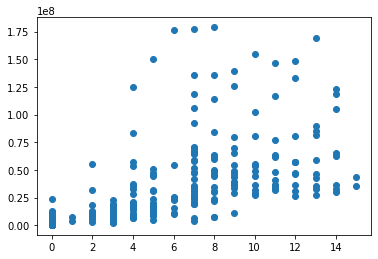

In [82]:
y = data.MPtvo_TotCt
plt.scatter(x, y)

In [83]:
# sns.pairplot(data)

In [84]:
# sns.pairplot(testDF)

In [85]:
testDF.columns

Index(['Batch', 'Vessel', 'DPI', 'DO_pct', 'pH_online', 'pH_offline',
       'O₂_%sat', 'CO₂_%sat', 'L_Glut', 'Gluc', 'Lact', 'Ammon', 'Nuc_NonVi',
       'Nuc_TotCt', 'Nuc_LiveCt', 'Nuc_Viab', 'MPbio_TotCt', 'MPtvo_TotCt',
       'Intra_Ct', 'Micro_Intra', 'Micro_Extra', 'Intra_Code', 'Extra_Code',
       'ELISA_KZO', 'Live_Titer', 'VCD_OD', 'RNA', 'gDNA/1mL', 'Antifoam'],
      dtype='object')

In [86]:
corrDF = testDF.corr()
corrDF

,DPI,DO_pct,pH_online,pH_offline,O₂_%sat,CO₂_%sat,L_Glut,Gluc,Lact,Ammon,...,MPtvo_TotCt,Intra_Ct,Intra_Code,Extra_Code,ELISA_KZO,Live_Titer,VCD_OD,RNA,gDNA/1mL,Antifoam
DPI,1.000000,-0.275326,-0.163296,-0.112365,-0.063865,-0.101220,-0.785802,-0.708295,0.220710,0.831815,...,-0.013744,0.288664,0.505777,0.829722,0.617539,0.619671,0.958727,-0.123444,0.702237,NaN
DO_pct,-0.275326,1.000000,0.105738,0.040839,0.001469,0.114967,0.299281,0.203165,-0.150793,-0.268858,...,-0.026365,-0.036068,-0.143880,-0.382558,0.073006,-0.857695,-0.644800,0.013532,-0.149384,NaN
pH_online,-0.163296,0.105738,1.000000,0.500569,0.044728,0.281500,0.088232,0.384183,-0.554909,-0.181785,...,-0.009550,0.004538,-0.060772,-0.129702,0.114055,-0.873483,-0.769757,0.085701,-0.496685,NaN
pH_offline,-0.112365,0.040839,0.500569,1.000000,0.397026,0.317669,0.062938,0.241264,-0.194310,-0.210453,...,-0.067020,-0.158694,-0.131722,-0.162616,0.028297,-0.701654,-0.753275,0.030460,-0.593829,NaN
O₂_%sat,-0.063865,0.001469,0.044728,0.397026,1.000000,0.900190,-0.079755,0.018089,0.089330,-0.027287,...,-0.008807,0.127375,-0.142562,-0.189061,-0.153240,0.060228,-0.407834,0.022853,-0.007434,NaN
CO₂_%sat,-0.101220,0.114967,0.281500,0.317669,0.900190,1.000000,-0.055923,0.098207,-0.021789,-0.068777,...,-0.000824,0.342571,-0.124757,-0.196837,-0.111561,-0.722276,-0.633033,0.139728,-0.008124,NaN
L_Glut,-0.785802,0.299281,0.088232,0.062938,-0.079755,-0.055923,1.000000,0.473042,-0.078229,-0.692741,...,-0.055354,-0.377039,-0.454554,-0.680833,-0.417699,NaN,-1.000000,-0.115538,-0.815734,NaN
Gluc,-0.708295,0.203165,0.384183,0.241264,0.018089,0.098207,0.473042,1.000000,-0.542684,-0.722307,...,-0.005337,-0.156796,-0.353557,-0.588454,-0.251983,-0.459863,-0.745869,0.129989,-0.671177,NaN
Lact,0.220710,-0.150793,-0.554909,-0.194310,0.089330,-0.021789,-0.078229,-0.542684,1.000000,0.201444,...,-0.030308,-0.117979,-0.005719,0.200190,-0.022650,0.536199,0.746643,-0.252464,0.406646,NaN
Ammon,0.831815,-0.268858,-0.181785,-0.210453,-0.027287,-0.068777,-0.692741,-0.722307,0.201444,1.000000,...,0.735405,0.413886,0.571546,0.790150,0.474429,0.202649,0.918370,0.181657,0.916097,NaN


In [87]:
testDF.corrwith(testDF.MPbio_TotCt).sort_values(ascending=False)

MPbio_TotCt    1.000000
VCD_OD         0.956162
Ammon          0.876583
DPI            0.858668
gDNA/1mL       0.851490
Extra_Code     0.798070
Nuc_NonVi      0.763418
Nuc_TotCt      0.746729
ELISA_KZO      0.746065
Nuc_LiveCt     0.720506
Live_Titer     0.682768
Intra_Code     0.541130
Intra_Ct       0.461748
Lact           0.165469
MPtvo_TotCt   -0.010303
O₂_%sat       -0.073564
RNA           -0.075884
pH_online     -0.084109
pH_offline    -0.092102
CO₂_%sat      -0.111012
DO_pct        -0.241108
Nuc_Viab      -0.343780
L_Glut        -0.688426
Gluc          -0.691065
Antifoam            NaN
dtype: float64

In [88]:
testDF.corrwith(testDF.ELISA_KZO).sort_values(ascending=False)

C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2551: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2480: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


ELISA_KZO      1.000000
VCD_OD         0.822339
MPbio_TotCt    0.746065
Live_Titer     0.620955
DPI            0.617539
Ammon          0.474429
Nuc_NonVi      0.441810
Extra_Code     0.433506
MPtvo_TotCt    0.194619
Nuc_TotCt      0.130641
pH_online      0.114055
Nuc_LiveCt     0.081237
DO_pct         0.073006
pH_offline     0.028297
Lact          -0.022650
Intra_Code    -0.039128
CO₂_%sat      -0.111561
O₂_%sat       -0.153240
RNA           -0.195724
Gluc          -0.251983
Nuc_Viab      -0.387428
L_Glut        -0.417699
Intra_Ct      -0.678686
gDNA/1mL      -0.805817
Antifoam            NaN
dtype: float64

In [89]:
testDF.corrwith(testDF.VCD_OD).sort_values(ascending=False)

VCD_OD         1.000000
DPI            0.958727
MPbio_TotCt    0.956162
Extra_Code     0.929353
Ammon          0.918370
Nuc_NonVi      0.868025
Live_Titer     0.866064
Nuc_TotCt      0.839233
ELISA_KZO      0.822339
Nuc_LiveCt     0.799744
Lact           0.746643
MPtvo_TotCt    0.489553
Intra_Code     0.253008
O₂_%sat       -0.407834
Nuc_Viab      -0.587653
CO₂_%sat      -0.633033
DO_pct        -0.644800
Gluc          -0.745869
pH_offline    -0.753275
pH_online     -0.769757
L_Glut        -1.000000
Intra_Ct            NaN
RNA                 NaN
gDNA/1mL            NaN
Antifoam            NaN
dtype: float64

In [90]:
# testDF.dtypes

In [91]:
testDF[testDF.VCD_OD.notnull()]

,Batch,Vessel,DPI,DO_pct,pH_online,pH_offline,O₂_%sat,CO₂_%sat,L_Glut,Gluc,...,Micro_Intra,Micro_Extra,Intra_Code,Extra_Code,ELISA_KZO,Live_Titer,VCD_OD,RNA,gDNA/1mL,Antifoam
194,457597PV,1000L SUB,0.0,41.74,7.09,7.086,0.805,0.080,2.76,NaN,...,"Light, 1+","Light, 1+",2.0,2.0,NaN,NaN,0.05,NaN,NaN,NaN
197,457597PV,1000L SUB,3.0,6.16,7.06,7.197,NaN,0.060,1.80,NaN,...,"Some, 2+","Some, 2+",3.0,3.0,NaN,NaN,0.45,NaN,NaN,NaN
198,457597PV,1000L SUB,4.0,5.93,7.05,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.60,NaN,NaN,NaN
199,457597PV,1000L SUB,5.0,6.08,7.06,7.035,0.688,0.083,NaN,4.00,...,"Heavy, 3+","Heavy, 3+",4.0,4.0,NaN,NaN,0.93,NaN,NaN,NaN
200,457597PV,1000L SUB,6.0,5.93,7.06,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.17,NaN,NaN,NaN
201,457597PV,1000L SUB,7.0,6.08,7.06,6.962,0.635,0.093,NaN,3.94,...,"Heavy, 3+","Very Heavy, 4+",4.0,5.0,4827.0,3.50,1.56,NaN,NaN,NaN
203,457597PV,1000L SUB,9.0,3.47,6.78,6.836,0.625,0.062,NaN,2.91,...,"Heavy, 3+","Very Heavy, 4+",4.0,5.0,5570.0,4.50,2.26,NaN,NaN,NaN
204,457597PV,1000L SUB,10.0,0.82,6.69,6.691,0.514,0.060,NaN,2.41,...,"Heavy, 3+","Very Heavy, 4+",4.0,5.0,6663.0,NaN,2.45,NaN,NaN,NaN
205,457597PV,1000L SUB,11.0,2.47,6.61,6.658,0.673,0.027,NaN,2.62,...,"Some, 2+","Very Heavy, 4+",3.0,5.0,6044.0,5.50,2.49,NaN,NaN,NaN
206,457597PV,1000L SUB,12.0,2.08,6.95,6.968,0.586,0.017,NaN,1.86,...,"Some, 2+","Very Heavy, 4+",3.0,5.0,6602.0,4.65,2.58,NaN,NaN,NaN


### Pearson Ranking

In [92]:
from yellowbrick.features import Rank2D

In [93]:
# # Set up figure size
# %matplotlib inline
# plt.rcParams['figure.figsize'] = (15, 7)

In [94]:
# num_features = ['Batch', 'Vessel', 'DPI', 'DO_pct', 'pH_online', 'pH_offline',
#        'O₂_%sat', 'CO₂_%sat', 'L_Glut', 'Gluc', 'Lact', 'Ammon', 'Nuc_NonVi',
#        'Nuc_TotCt', 'Nuc_LiveCt', 'Nuc_Viab', 'MPbio_TotCt', 'MPtvo_TotCt',
#        'Intra_Ct', 'Micro_Intra', 'Micro_Extra', 'Intra_Code', 'Extra_Code',
#        'ELISA_KZO', 'Live_Titer', 'VCD_OD', 'RNA', 'gDNA/1mL', 'Antifoam']

In [95]:
type(testDF.columns)

pandas.core.indexes.base.Index

In [96]:
testDF.columns

Index(['Batch', 'Vessel', 'DPI', 'DO_pct', 'pH_online', 'pH_offline',
       'O₂_%sat', 'CO₂_%sat', 'L_Glut', 'Gluc', 'Lact', 'Ammon', 'Nuc_NonVi',
       'Nuc_TotCt', 'Nuc_LiveCt', 'Nuc_Viab', 'MPbio_TotCt', 'MPtvo_TotCt',
       'Intra_Ct', 'Micro_Intra', 'Micro_Extra', 'Intra_Code', 'Extra_Code',
       'ELISA_KZO', 'Live_Titer', 'VCD_OD', 'RNA', 'gDNA/1mL', 'Antifoam'],
      dtype='object')

In [97]:
testDF.dtypes

Batch           object
Vessel          object
DPI            float64
DO_pct         float64
pH_online      float64
pH_offline     float64
O₂_%sat        float64
CO₂_%sat       float64
L_Glut         float64
Gluc           float64
Lact           float64
Ammon          float64
Nuc_NonVi      float64
Nuc_TotCt      float64
Nuc_LiveCt     float64
Nuc_Viab       float64
MPbio_TotCt    float64
MPtvo_TotCt    float64
Intra_Ct       float64
Micro_Intra     object
Micro_Extra     object
Intra_Code     float64
Extra_Code     float64
ELISA_KZO      float64
Live_Titer     float64
VCD_OD         float64
RNA            float64
gDNA/1mL       float64
Antifoam       float64
dtype: object

In [98]:
# types = testDF.dtypes.tolist()

In [99]:
# cols = testDF.columns.tolist()

In [100]:
# newDict = dict(zip(cols, types))

In [101]:
# zip(cols, types)

In [102]:
# colsTypes = list(zip(cols, types))

In [103]:
# Generate list of num type columns:
colsTypes = list(zip(testDF.columns, testDF.dtypes))
num_features = []
for col, typ in colsTypes:
    if typ == 'float64':
        num_features.append(col)

In [104]:
# Set up figure size
%matplotlib inline
plt.rcParams['figure.figsize'] = (15, 7)

In [105]:
X = testDF[num_features].values

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8322 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8322 missing from current font.
  font.set_text(s, 0, flags=flags)


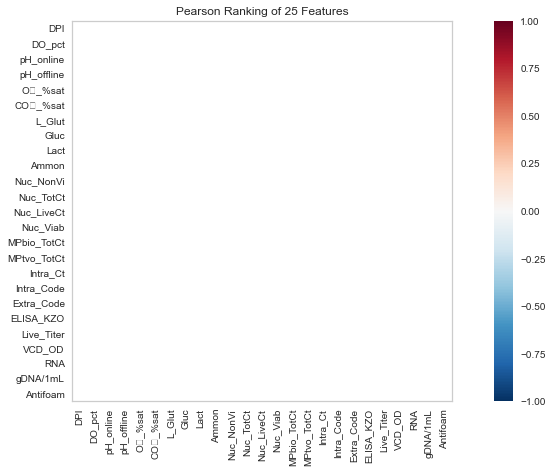

<AxesSubplot:title={'center':'Pearson Ranking of 25 Features'}>

In [106]:
# Instantiate the visualizer with the Covariance ranking algorithm
visualizer = Rank2D(features=num_features, algorithm='pearson') # ‘pearson’, ‘covariance’, ‘spearman’, or ‘kendalltau’
visualizer.fit(X)  # Fit the data to the visualizer
visualizer.transform(X)  # Transform the data
# visualizer.poof()  # Draw/show/poof the data
visualizer.poof()#outpath='pcoords1.png') # Draw/show/poof the data
# plt.show()

In [107]:
X

array([[ 3.   ,    nan,    nan, ...,    nan,    nan,    nan],
       [ 0.   , 15.39 ,  6.983, ...,    nan,    nan,    nan],
       [ 4.   ,  6.14 ,  7.038, ...,    nan,    nan,    nan],
       ...,
       [12.   ,  6.14 ,  7.05 , ...,    nan,    nan,    nan],
       [13.   ,  5.73 ,  7.05 , ...,    nan,    nan,    nan],
       [14.   ,  3.49 ,  7.06 , ...,    nan,    nan,    nan]])

In [108]:
testDF.isnull().any()

Batch          False
Vessel         False
DPI            False
DO_pct          True
pH_online       True
pH_offline      True
O₂_%sat         True
CO₂_%sat        True
L_Glut          True
Gluc            True
Lact            True
Ammon           True
Nuc_NonVi       True
Nuc_TotCt       True
Nuc_LiveCt      True
Nuc_Viab        True
MPbio_TotCt     True
MPtvo_TotCt     True
Intra_Ct        True
Micro_Intra     True
Micro_Extra     True
Intra_Code      True
Extra_Code      True
ELISA_KZO       True
Live_Titer      True
VCD_OD          True
RNA             True
gDNA/1mL        True
Antifoam        True
dtype: bool

In [109]:
pearsDF = testDF.copy()

In [110]:
pearsDF = pearsDF[pearsDF.MPbio_TotCt.notnull()]

In [111]:
pearsDF = pearsDF[pearsDF.Extra_Code.notnull()]

In [112]:
pearsDF = pearsDF[pearsDF.Intra_Code.notnull()]

In [113]:
pearsDF = pearsDF[pearsDF.Nuc_NonVi.notnull()]

In [114]:
pearsDF = pearsDF[pearsDF.ELISA_KZO.notnull()]

In [115]:
pearsDF.shape

(73, 29)

In [118]:
num_features

['DPI',
 'DO_pct',
 'pH_online',
 'pH_offline',
 'O₂_%sat',
 'CO₂_%sat',
 'L_Glut',
 'Gluc',
 'Lact',
 'Ammon',
 'Nuc_NonVi',
 'Nuc_TotCt',
 'Nuc_LiveCt',
 'Nuc_Viab',
 'MPbio_TotCt',
 'MPtvo_TotCt',
 'Intra_Ct',
 'Intra_Code',
 'Extra_Code',
 'ELISA_KZO',
 'Live_Titer',
 'VCD_OD',
 'RNA',
 'gDNA/1mL',
 'Antifoam']

In [119]:
features = ['DPI',
 'DO_pct',
 'pH_online',
 'pH_offline',
 'Nuc_NonVi',
 'Nuc_TotCt',
 'Nuc_LiveCt',
 'Nuc_Viab',
 'MPbio_TotCt',
 'MPtvo_TotCt',
 'Intra_Code',
 'Extra_Code',
 'ELISA_KZO']

In [120]:
X = pearsDF[features].values

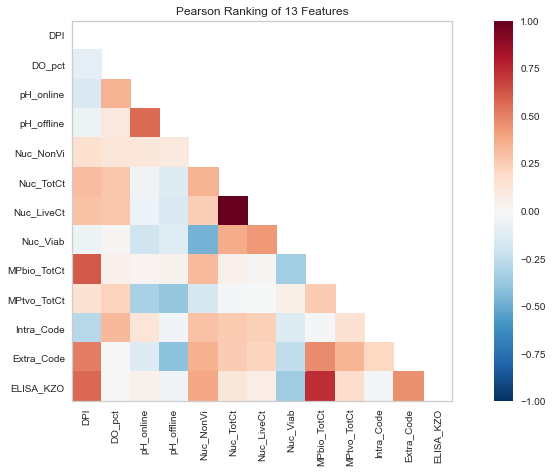

<AxesSubplot:title={'center':'Pearson Ranking of 13 Features'}>

In [121]:
# Instantiate the visualizer with the Covariance ranking algorithm
visualizer = Rank2D(features=features, algorithm='pearson') # ‘pearson’, ‘covariance’, ‘spearman’, or ‘kendalltau’
visualizer.fit(X)  # Fit the data to the visualizer
visualizer.transform(X)  # Transform the data
# visualizer.poof()  # Draw/show/poof the data
visualizer.poof()#outpath='pcoords1.png') # Draw/show/poof the data
# plt.show()

# REFRESH

In [122]:
# Load libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [123]:
# Load data to a DataFrame
vessel_data = pd.read_excel('Compiled_Lawsonia.xlsx')

In [124]:
# Check the dimensions of the table
print(f"The table is {vessel_data.shape[0]} rows x {vessel_data.shape[1]} columns.")

The table is 465 rows x 39 columns.


In [125]:
# Get an initial look at the data
vessel_data.head()

,Batch,Vessel,DPI,Date,Time,Temp_C,Agitation,DO_pct,pH_online,pH_offline,...,Micro_Comments,Intra_Code,Extra_Code,ELISA_KZO,ELISA_LNK,Live_Titer,VCD_OD,RNA,gDNA/1mL,Antifoam
0,369697PV,Flasks,3,2019-07-12,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,369697PV,5L BLU,M,2019-07-12,09:25:00,36.0,40.0,7.37,7.035,6.783,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,369697PV,5L BLU,0,2019-07-12,10:53:00,35.8,40.0,15.39,6.983,7.118,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,369697PV,5L BLU,1,2019-07-13,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,369697PV,5L BLU,2,2019-07-14,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


There are a lot of NaNs that will need to be dealt with.  
DPI is days post inoculation and that column contains several 'M's, which are just the media, prior to inoculation, and can also be removed.

In [126]:
# Remove rows from 'DPI' column which are 'M'
vessel_data = vessel_data[vessel_data.DPI!='M']

In [127]:
# Check each column for NaNs
pd.isnull(vessel_data).any()

Batch             False
Vessel            False
DPI                True
Date               True
Time               True
Temp_C             True
Agitation          True
DO_pct             True
pH_online          True
pH_offline         True
O₂_%sat            True
CO₂_%sat           True
L_Glut             True
Gluc               True
Lact               True
Ammon              True
Nuc_NonVi          True
Nuc_TotCt          True
Nuc_LiveCt         True
Nuc_Viab           True
MPbio_Blank        True
MPbio_Area         True
MPbio_TotCt        True
MPtvo_Blank        True
MPtvo_Area         True
MPtvo_TotCt        True
Intra_Ct           True
Micro_Intra        True
Micro_Extra        True
Micro_Comments     True
Intra_Code         True
Extra_Code         True
ELISA_KZO          True
ELISA_LNK          True
Live_Titer         True
VCD_OD             True
RNA                True
gDNA/1mL           True
Antifoam           True
dtype: bool

DPI shouldn't have any null values.

In [128]:
# Remove rows from 'DPI' which are NaN
vessel_data = vessel_data[vessel_data['DPI'].notnull()]

In [129]:
# Check the types of data
vessel_data.dtypes

Batch                     object
Vessel                    object
DPI                       object
Date              datetime64[ns]
Time                      object
Temp_C                   float64
Agitation                float64
DO_pct                   float64
pH_online                float64
pH_offline               float64
O₂_%sat                  float64
CO₂_%sat                 float64
L_Glut                   float64
Gluc                     float64
Lact                     float64
Ammon                    float64
Nuc_NonVi                 object
Nuc_TotCt                float64
Nuc_LiveCt               float64
Nuc_Viab                 float64
MPbio_Blank              float64
MPbio_Area               float64
MPbio_TotCt              float64
MPtvo_Blank              float64
MPtvo_Area               float64
MPtvo_TotCt              float64
Intra_Ct                 float64
Micro_Intra               object
Micro_Extra               object
Micro_Comments            object
Intra_Code

Now that we romoved 'M' from the 'DPI' column the variable should be numeric, so we'll convert to integers.

In [130]:
# Convert 'DPI' column to numeric
vessel_data['DPI'] = vessel_data['DPI'].astype(int)

The 'Nuc_NonVi' should be numeric and I know what the issue is: there is a lower limit of detection of 5000 on that piece of equipment and if the value falls below that, we record as '<5k'. I will replace all of these with 2500 (half the lower limit).

In [131]:
# Replace '<5k' in 'Nuc_NonVi' column with 1/2 lower limit
vessel_data.Nuc_NonVi = vessel_data.Nuc_NonVi.replace('<5k', 5000/2)

The 'Micro_Intra' and 'Micro_Extra' are ordered categorical descriptions used when looking at the organism under the microscope. These are standardized, so I will create new columns 'Extra_Coded' and 'Intra_Coded' to code them into numeric values.

In [132]:
# Check the standard descriptions for microscopy
print(vessel_data.Micro_Intra.unique())
print(vessel_data.Micro_Extra.unique())

[nan 'Light, 1+' 'Some, 2+' 'Heavy, 3+' 'Very Light, <1+' 'Very Heavy, 4+']
[nan 'Some, 2+' 'Heavy, 3+' 'Very Heavy, 4+' 'Light, 1+' 'Very Light, <1+'
 'Heavy, 3+ ']


'Micro_Extra' appears to have an extra space in at least one of the fields, which will need to be stripped first.

In [133]:
# Strip whitespace from 'Micro_Extra' column
vessel_data['Micro_Extra'] = vessel_data.Micro_Extra.str.strip()

In [134]:
# Map values to new columns based on descriptions
dict = {'Very Light, <1+': 1, 'Light, 1+': 2, 'Some, 2+': 3, 'Heavy, 3+': 4, 'Very Heavy, 4+': 5}
vessel_data['Intra_Code'] = vessel_data['Micro_Intra'].map(dict)
vessel_data['Extra_Code'] = vessel_data['Micro_Extra'].map(dict)

The 'VCD_OD' column has data for a probe that I used on two runs, but was not working correctly for one of the runs and provided inaccurate data, which will need to be removed.

In [135]:
# Remove inaccurate data
vessel_data.loc[(vessel_data.Batch == '471341PV'), 'VCD_OD'] = np.nan

Many of the NaN values in the data set are days with no sampling and those can be removed completely. 

In [136]:
print(f"{vessel_data.shape[0]} rows before removing non-sampling days.")

422 rows before removing non-sampling days.


In [137]:
# Remove rows that contain no data beyond the batch/vessel identifiers and day/date/time info
colList = vessel_data.columns[5:]
vessel_data.dropna(axis=0, subset=colList, how="all", inplace=True)

In [138]:
print(f"{vessel_data.shape[0]} rows after removing non-sampling days.")

352 rows after removing non-sampling days.


### Take another look at the data

In [139]:
vessel_data.head()

,Batch,Vessel,DPI,Date,Time,Temp_C,Agitation,DO_pct,pH_online,pH_offline,...,Micro_Comments,Intra_Code,Extra_Code,ELISA_KZO,ELISA_LNK,Live_Titer,VCD_OD,RNA,gDNA/1mL,Antifoam
0,369697PV,Flasks,3,2019-07-12,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,369697PV,5L BLU,0,2019-07-12,10:53:00,35.8,40.0,15.39,6.983,7.118,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,369697PV,5L BLU,4,2019-07-16,08:47:00,36.0,40.0,6.14,7.038,6.978,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,369697PV,5L BLU,7,2019-07-19,08:35:00,36.0,40.0,5.77,7.028,6.947,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11,369697PV,50L BLU,0,2019-07-19,09:00:00,36.0,42.0,6.26,7.034,7.003,...,None,2.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [140]:
print("Describe Data:")

Describe Data:


In [141]:
print("\tColumns 1-11:")
vessel_data.describe().iloc[:,:11]

	Columns 1-11:


,DPI,Temp_C,Agitation,DO_pct,pH_online,pH_offline,O₂_%sat,CO₂_%sat,L_Glut,Gluc,Lact
count,352.000000,339.000000,339.000000,339.000000,339.000000,262.000000,241.000000,246.000000,195.000000,249.000000,216.000000
mean,5.315341,35.986667,49.731711,6.416254,7.046743,7.052683,1.327440,0.082272,0.877846,3.892048,0.256074
std,3.858611,0.110077,10.182909,3.231918,0.042150,0.094749,9.046905,0.127859,0.846720,0.696477,0.278071
min,0.000000,34.780000,40.000000,0.160000,6.610000,6.658000,0.034000,0.008000,0.000000,1.080000,0.000000
25%,2.000000,36.000000,42.000000,5.590000,7.050000,7.006000,0.377000,0.055000,0.050000,3.600000,0.090000
50%,5.000000,36.000000,48.900000,5.980000,7.050000,7.050500,0.475000,0.073000,0.660000,4.120000,0.185979
75%,8.000000,36.000000,49.200000,6.300000,7.060000,7.091000,0.614000,0.089000,1.515000,4.390000,0.310000
max,15.000000,36.400000,67.300000,41.740000,7.140000,7.525000,100.000000,1.900000,3.270000,4.900000,1.760000


In [142]:
print("\tColumns 12-22:")
vessel_data.describe().iloc[:,11:22]

	Columns 12-22:


,Ammon,Nuc_NonVi,Nuc_TotCt,Nuc_LiveCt,Nuc_Viab,MPbio_Blank,MPbio_Area,MPbio_TotCt,MPtvo_Blank,MPtvo_Area,MPtvo_TotCt
count,226.000000,269.000000,2.690000e+02,2.690000e+02,269.000000,240.000000,2.400000e+02,2.410000e+02,240.000000,240.000000,2.410000e+02
mean,1.924248,29711.895911,5.642305e+05,5.335465e+05,0.946986,1105.387500,4.740820e+05,1.207705e+08,289.845833,153250.683333,7.745817e+07
std,1.160151,42916.459196,4.361427e+05,4.072878e+05,0.050340,1404.196599,3.759511e+05,9.880619e+07,1363.298865,154588.907064,6.032180e+08
min,0.280000,2500.000000,1.500000e+04,1.000000e+04,0.561905,21.000000,2.790000e+03,6.690000e+05,0.000000,917.000000,2.190000e+05
25%,0.962500,2500.000000,1.890000e+05,1.840000e+05,0.928244,348.500000,1.376765e+05,3.430000e+07,11.000000,39264.000000,9.741250e+06
50%,1.800000,8000.000000,4.230000e+05,4.130000e+05,0.962121,568.000000,4.228810e+05,1.054670e+08,32.000000,113248.000000,2.940000e+07
75%,2.850000,42000.000000,8.550000e+05,8.230000e+05,0.980769,1111.000000,7.553715e+05,2.018952e+08,53.000000,200863.750000,5.370000e+07
max,5.930000,212000.000000,1.880000e+06,1.835000e+06,0.994111,7275.000000,1.400818e+06,3.940000e+08,16757.000000,716160.000000,9.384000e+09


In [143]:
print("\tColumns 23-32:")
vessel_data.describe().iloc[:,22:33]

	Columns 23-32:


,Intra_Ct,Intra_Code,Extra_Code,ELISA_KZO,ELISA_LNK,Live_Titer,VCD_OD,RNA,gDNA/1mL,Antifoam
count,76.000000,247.000000,247.000000,82.000000,21.000000,5.000000,11.000000,47.000000,5.600000e+01,7.0
mean,15.894737,2.655870,3.890688,9263.341463,6926.571429,4.530000,1.521818,15827.859284,1.960579e+08,1.0
std,23.289242,1.054894,1.179170,3295.625088,2853.117638,0.710282,0.925406,22378.752738,1.507412e+08,0.0
min,0.000000,1.000000,1.000000,1630.000000,3156.000000,3.500000,0.050000,170.000000,2.545546e+06,1.0
25%,2.750000,2.000000,3.000000,6617.250000,4889.000000,4.500000,0.765000,1478.957764,7.661384e+07,1.0
50%,7.500000,3.000000,4.000000,9670.250000,5549.000000,4.500000,1.560000,7378.627930,1.359994e+08,1.0
75%,20.000000,3.000000,5.000000,11124.500000,9758.000000,4.650000,2.355000,23748.478516,2.879057e+08,1.0
max,127.000000,5.000000,5.000000,17020.000000,11965.000000,5.500000,2.580000,103762.656250,6.374318e+08,1.0


In [144]:
print("Summarized Data:")
vessel_data.describe(include=['O'])

Summarized Data:


,Batch,Vessel,Time,Micro_Intra,Micro_Extra,Micro_Comments
count,352,352,341,247,247,248
unique,12,5,162,5,5,23
top,381550PV,1000L SUB,09:00:00,"Some, 2+","Very Heavy, 4+",None
freq,38,109,7,97,105,225


### Think about the data

* **ELISA** results will be the target variable. There are two columns for this because testing was sometimes performed at two locations, for comparison. The 'ELISA_KZO' variable was used consistently throughout and so 'ELISA_LNK' is not needed.  
* Many of the results from the daily sampling are either nutrients that are consumed during growth (L-Glut, Gluc) or are by-products of growth (Lact, Ammon). While these correspond with growth kinetics, they may not be good indicators as passage or harvest criteria.  
* I plan to look for correlations of the target 'ELISA_KZO' variable with different analytical methods as well as correlations with the 'MPbio_TotCt' variable to find a viable replacement for the analytical method.  
* I would also like to split the batches based on the final ELISA result into "good" and "bad" runs to see if I can find any differences that might explain why some are better than others.

In [145]:
# Look for correlations 
corrDF = vessel_data.corr()
corrDF

,DPI,Temp_C,Agitation,DO_pct,pH_online,pH_offline,O₂_%sat,CO₂_%sat,L_Glut,Gluc,...,Intra_Ct,Intra_Code,Extra_Code,ELISA_KZO,ELISA_LNK,Live_Titer,VCD_OD,RNA,gDNA/1mL,Antifoam
DPI,1.000000,0.100553,0.016790,-0.275326,-0.163296,-0.112365,-0.063865,-0.101220,-0.785802,-0.708295,...,0.288664,0.505777,0.829476,0.617539,0.337400,0.619671,0.958727,-0.123444,0.702237,NaN
Temp_C,0.100553,1.000000,-0.021115,-0.192914,-0.020775,0.030124,0.086086,0.080981,-0.019335,-0.065916,...,0.084120,0.081274,0.177272,0.073257,0.213345,0.810647,-0.364863,0.130016,0.164139,NaN
Agitation,0.016790,-0.021115,1.000000,-0.234914,0.205581,0.244603,0.228620,-0.050011,-0.084685,0.019647,...,-0.166989,-0.053710,0.117080,-0.037613,0.213592,-0.763425,-0.360764,-0.089946,-0.269026,NaN
DO_pct,-0.275326,-0.192914,-0.234914,1.000000,0.105738,0.040839,0.001469,0.114967,0.299281,0.203165,...,-0.036068,-0.143880,-0.382579,0.073006,0.220922,-0.857695,-0.644800,0.013532,-0.149384,NaN
pH_online,-0.163296,-0.020775,0.205581,0.105738,1.000000,0.500569,0.044728,0.281500,0.088232,0.384183,...,0.004538,-0.060772,-0.129673,0.114055,0.178015,-0.873483,-0.769757,0.085701,-0.496685,NaN
pH_offline,-0.112365,0.030124,0.244603,0.040839,0.500569,1.000000,0.397026,0.317669,0.062938,0.241264,...,-0.158694,-0.131722,-0.162685,0.028297,0.351691,-0.701654,-0.753275,0.030460,-0.593829,NaN
O₂_%sat,-0.063865,0.086086,0.228620,0.001469,0.044728,0.397026,1.000000,0.900190,-0.079755,0.018089,...,0.127375,-0.142562,-0.189104,-0.153240,-0.215291,0.060228,-0.407834,0.022853,-0.007434,NaN
CO₂_%sat,-0.101220,0.080981,-0.050011,0.114967,0.281500,0.317669,0.900190,1.000000,-0.055923,0.098207,...,0.342571,-0.124757,-0.196744,-0.111561,-0.126113,-0.722276,-0.633033,0.139728,-0.008124,NaN
L_Glut,-0.785802,-0.019335,-0.084685,0.299281,0.088232,0.062938,-0.079755,-0.055923,1.000000,0.473042,...,-0.377039,-0.454554,-0.680830,-0.417699,NaN,NaN,-1.000000,-0.115538,-0.815734,NaN
Gluc,-0.708295,-0.065916,0.019647,0.203165,0.384183,0.241264,0.018089,0.098207,0.473042,1.000000,...,-0.156796,-0.353557,-0.587348,-0.251983,-0.433567,-0.459863,-0.745869,0.129989,-0.671177,NaN


There are too many correlations to look through, so I will look specifically at the variables of interest:

In [146]:
# Variables with ELISA_KZO correlation >0.5 (positive or negative)
vessel_data.corrwith(vessel_data.ELISA_KZO)[abs(vessel_data.corrwith(vessel_data.ELISA_KZO)) > 0.5].sort_values(ascending=False)

C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2551: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2480: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


ELISA_KZO      1.000000
ELISA_LNK      0.963900
VCD_OD         0.822339
MPbio_Area     0.746802
MPbio_TotCt    0.746065
Live_Titer     0.620955
DPI            0.617539
Intra_Ct      -0.678686
gDNA/1mL      -0.805817
dtype: float64

In [147]:
# Variables with MPbio_TotCt correlation >0.5 (positive or negative)
vessel_data.corrwith(vessel_data.MPbio_TotCt)[abs(vessel_data.corrwith(vessel_data.MPbio_TotCt)) > 0.5].sort_values(ascending=False)

MPbio_TotCt    1.000000
MPbio_Area     0.972173
VCD_OD         0.956162
ELISA_LNK      0.888229
Ammon          0.876583
DPI            0.858668
gDNA/1mL       0.851490
Extra_Code     0.798078
Nuc_NonVi      0.763418
Nuc_TotCt      0.746729
ELISA_KZO      0.746065
Nuc_LiveCt     0.720506
Live_Titer     0.682768
MPtvo_Area     0.663341
Intra_Code     0.541130
L_Glut        -0.688426
Gluc          -0.691065
dtype: float64

We've already determined that the ELISA_LNK variable is redundant and I know the MBbio_Area is used to calculate MPbio_TotCt, so it won't provide any additional information. I'll add the rest of the variables to a list for comparison. 

In [148]:
num_features = ['DPI', 'L_Glut', 'Gluc', 'Ammon', 'Nuc_NonVi', 'Nuc_TotCt', 
                'Nuc_LiveCt', 'MPbio_TotCt', 'MPtvo_TotCt', 'Intra_Ct', 
                'Intra_Code', 'Extra_Code', 'ELISA_KZO', 'Live_Titer', 
                'VCD_OD', 'RNA', 'gDNA/1mL']

### Visualize Data

In [149]:
from yellowbrick.features import Rank2D

In [150]:
# Set up figure size
%matplotlib inline
plt.rcParams['figure.figsize'] = (15, 7)

In [151]:
# Generate list of num type columns:
colsTypes = list(zip(pearsDF.columns, pearsDF.dtypes))
num_features = []
for col, typ in colsTypes:
    if typ == 'float64':
        num_features.append(col)

In [152]:
# Most features are missing some data, which doesn't work with the Pearson
# calculation. Remove NaN's from some of the variables of interest
pearsDF = vessel_data.copy()
pearsDF = pearsDF[pearsDF.ELISA_KZO.notnull()]
pearsDF = pearsDF[pearsDF.MPbio_TotCt.notnull()]
pearsDF = pearsDF[pearsDF.Extra_Code.notnull()]
pearsDF = pearsDF[pearsDF.Nuc_NonVi.notnull()]
# See how much data is left
pearsDF.shape

(74, 39)

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8322 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8322 missing from current font.
  font.set_text(s, 0, flags=flags)


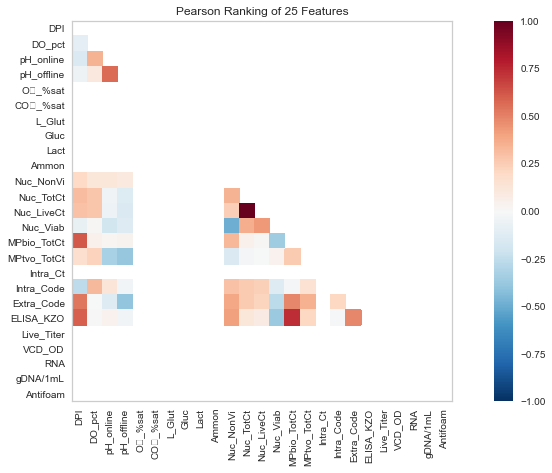

<AxesSubplot:title={'center':'Pearson Ranking of 25 Features'}>

In [153]:
X = pearsDF[num_features].values

# Instantiate the visualizer with the Covariance ranking algorithm
visualizer = Rank2D(features=num_features, algorithm='pearson') # ‘pearson’, ‘covariance’, ‘spearman’, or ‘kendalltau’
visualizer.fit(X)  # Fit the data to the visualizer
visualizer.transform(X)  # Transform the data
# visualizer.poof()  # Draw/show/poof the data
visualizer.poof()#outpath='pcoords1.png') # Draw/show/poof the data
# plt.show()

In [154]:
# Remove blank columns from Pearson ranking chart
num_features = ['Temp_C', 'Agitation', 'DO_pct', 'pH_online', 'pH_offline', 
                'Nuc_NonVi', 'Nuc_TotCt', 'Nuc_LiveCt', 'Nuc_Viab', 
                'MPbio_Blank', 'MPbio_Area', 'MPbio_TotCt', 'MPtvo_Blank', 
                'MPtvo_Area', 'MPtvo_TotCt', 'Intra_Code', 'Extra_Code', 'ELISA_KZO',]

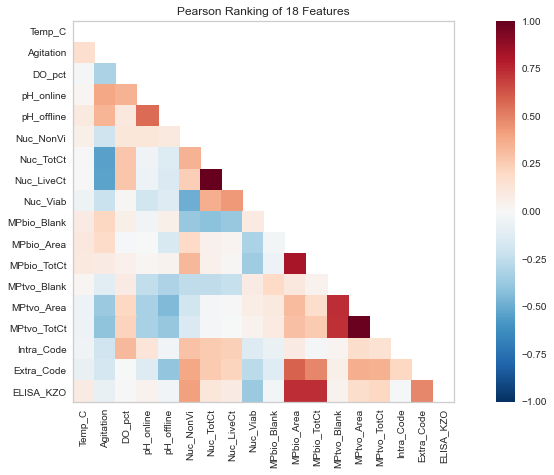

<AxesSubplot:title={'center':'Pearson Ranking of 18 Features'}>

In [155]:
X = pearsDF[num_features].values

# Instantiate the visualizer with the Covariance ranking algorithm
visualizer = Rank2D(features=num_features, algorithm='pearson') # ‘pearson’, ‘covariance’, ‘spearman’, or ‘kendalltau’
visualizer.fit(X)  # Fit the data to the visualizer
visualizer.transform(X)  # Transform the data
# visualizer.poof()  # Draw/show/poof the data
visualizer.poof()#outpath='pcoords1.png') # Draw/show/poof the data
# plt.show()

### Good Batches Bad Batches

In [160]:
vessel_data.groupby('Batch')['ELISA_KZO'].max().sort_values(ascending=False)

Batch
381550PV    17020.0
369697PV    15328.0
476587PV    13182.0
382576PV    12935.0
484262PV    11367.0
484261PV    11336.0
375221PV    10686.0
458161PV    10356.0
471341PV     6746.0
457597PV     6663.0
459820PV        NaN
484263PV        NaN
Name: ELISA_KZO, dtype: float64

In [161]:
good_batches = ['381550PV', '369697PV', '476587PV', '382576PV']
bad_batches = ['484262PV', '484261PV', '375221PV', '458161PV', '471341PV', '457597PV']

### Histograms

In [163]:
for i in vessel_data.columns:
    

Batch
Vessel
DPI
Date
Time
Temp_C
Agitation
DO_pct
pH_online
pH_offline
O₂_%sat
CO₂_%sat
L_Glut
Gluc
Lact
Ammon
Nuc_NonVi
Nuc_TotCt
Nuc_LiveCt
Nuc_Viab
MPbio_Blank
MPbio_Area
MPbio_TotCt
MPtvo_Blank
MPtvo_Area
MPtvo_TotCt
Intra_Ct
Micro_Intra
Micro_Extra
Micro_Comments
Intra_Code
Extra_Code
ELISA_KZO
ELISA_LNK
Live_Titer
VCD_OD
RNA
gDNA/1mL
Antifoam


array([[<AxesSubplot:title={'center':'DPI'}>,
        <AxesSubplot:title={'center':'Temp_C'}>,
        <AxesSubplot:title={'center':'Agitation'}>,
        <AxesSubplot:title={'center':'DO_pct'}>,
        <AxesSubplot:title={'center':'pH_online'}>,
        <AxesSubplot:title={'center':'pH_offline'}>],
       [<AxesSubplot:title={'center':'O₂_%sat'}>,
        <AxesSubplot:title={'center':'CO₂_%sat'}>,
        <AxesSubplot:title={'center':'L_Glut'}>,
        <AxesSubplot:title={'center':'Gluc'}>,
        <AxesSubplot:title={'center':'Lact'}>,
        <AxesSubplot:title={'center':'Ammon'}>],
       [<AxesSubplot:title={'center':'Nuc_NonVi'}>,
        <AxesSubplot:title={'center':'Nuc_TotCt'}>,
        <AxesSubplot:title={'center':'Nuc_LiveCt'}>,
        <AxesSubplot:title={'center':'Nuc_Viab'}>,
        <AxesSubplot:title={'center':'MPbio_Blank'}>,
        <AxesSubplot:title={'center':'MPbio_Area'}>],
       [<AxesSubplot:title={'center':'MPbio_TotCt'}>,
        <AxesSubplot:title={'center

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8322 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8322 missing from current font.
  font.set_text(s, 0, flags=flags)


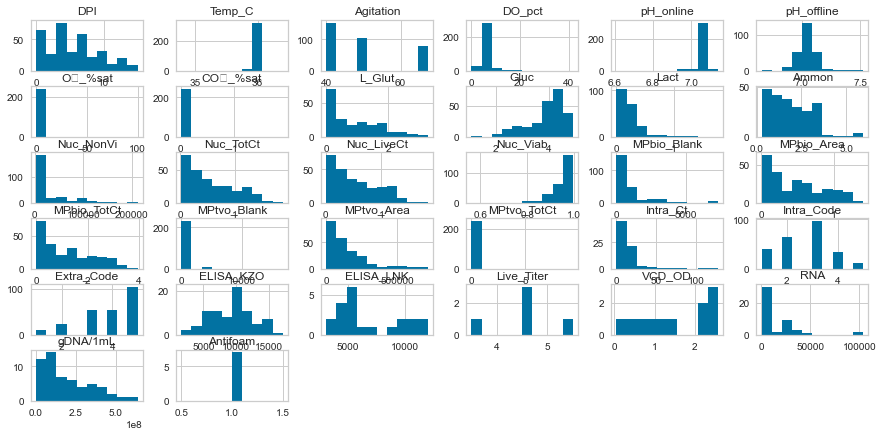

In [164]:
vessel_data.hist()

In [170]:
def make_histograms():
    # Make subplots
    fig, axes = plt.subplots(nrows=2, ncols=2)

    # Draw histrograms
    axes = axes.ravel()
    for idx, ax in enumerate(axes):
        ax.hist(df[num_features[idx]].dropna(), bins=20)
        ax.set_xlabel(xAxes[idx], fontsize=15)
        ax.set_ylabel(yAxes[idx], fontsize=15)
        ax.tick_params(axis='both', labelsize=10)

    plt.show()

Text(0.5, 1.0, 'Sampling Days')

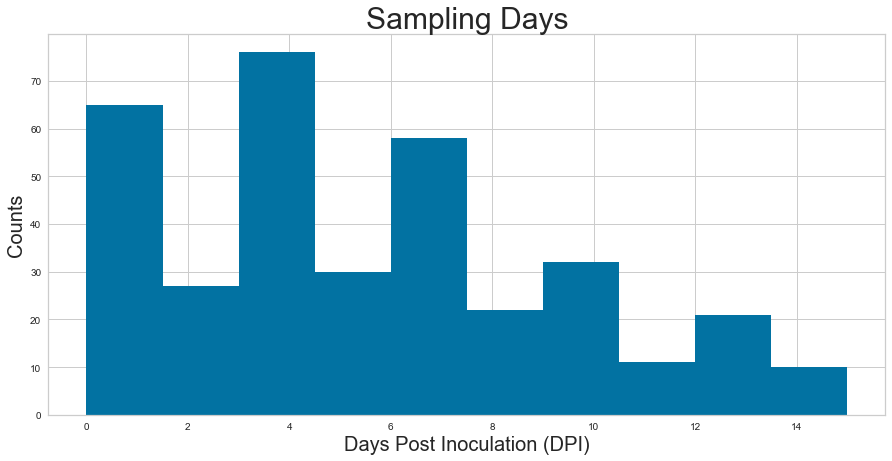

In [191]:
vessel_data.DPI.hist()
plt.xlabel("Days Post Inoculation (DPI)", fontsize=20)
plt.ylabel("Counts", fontsize=20)
plt.title("Sampling Days", fontsize=30)

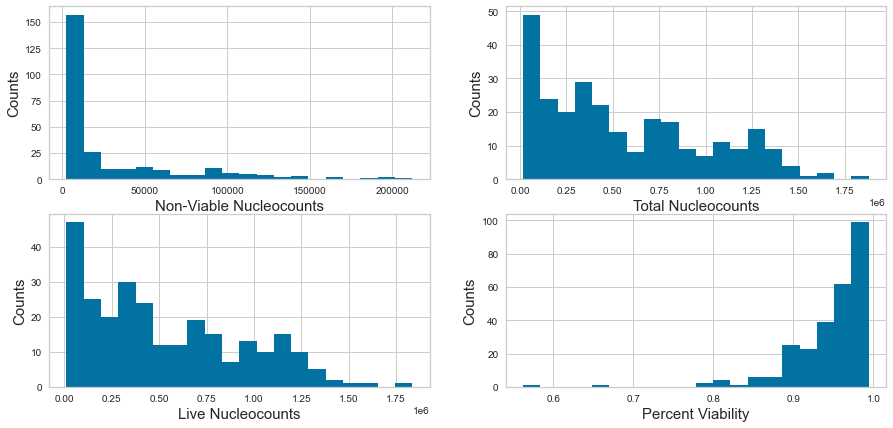

In [171]:
# Specify the features of interest
num_features = ['Nuc_NonVi', 'Nuc_TotCt', 'Nuc_LiveCt', 'Nuc_Viab']
xAxes = ['Non-Viable Nucleocounts', 'Total Nucleocounts', 'Live Nucleocounts', 'Percent Viability']
yAxes = ['Counts'] * 4

make_histograms()

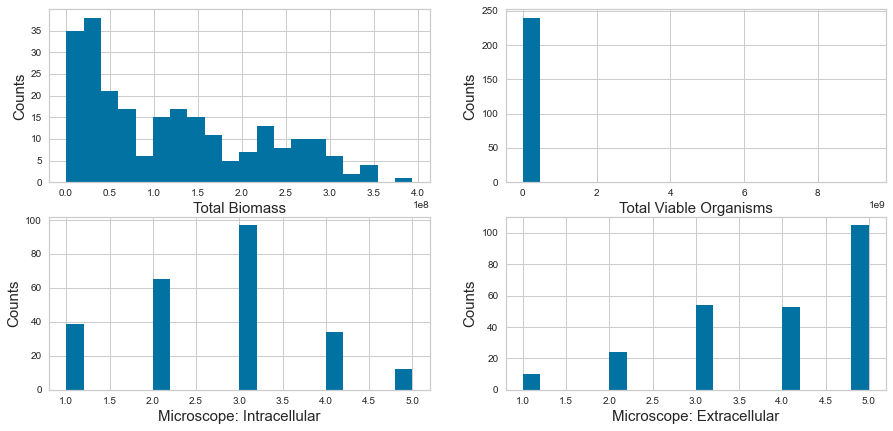

In [172]:
# Specify the features of interest
num_features = ['MPbio_TotCt', 'MPtvo_TotCt', 'Intra_Code', 'Extra_Code']
xAxes = ['Total Biomass', 'Total Viable Organisms', 'Microscope: Intracellular', 'Microscope: Extracellular']
yAxes = ['Counts'] * 4

make_histograms()

Text(0, 0.5, 'Counts')

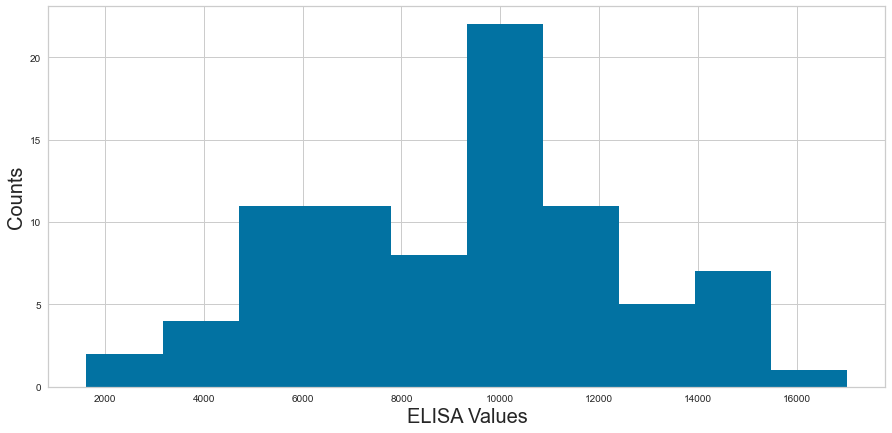

In [178]:
vessel_data.ELISA_KZO.hist()
plt.xlabel("ELISA Values", fontsize=20)
plt.ylabel("Counts", fontsize=20)

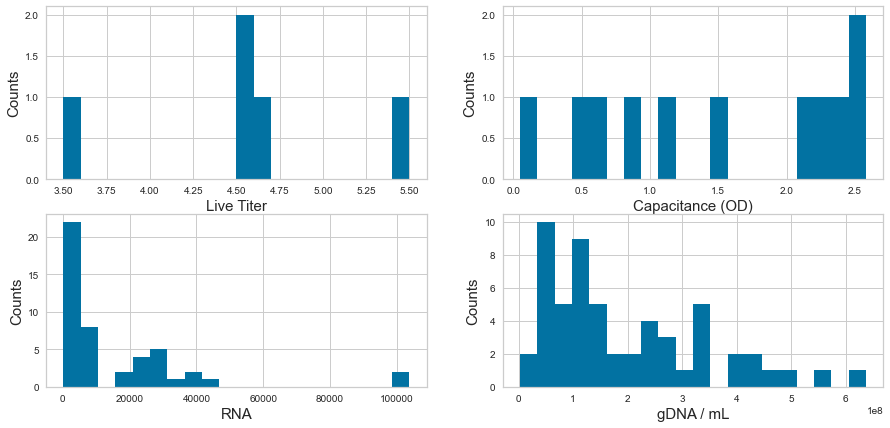

In [180]:
# Specify the features of interest
num_features = ['Live_Titer', 'VCD_OD', 'RNA', 'gDNA/1mL']
xAxes = ['Live Titer', 'Capacitance (OD)', 'RNA', 'gDNA / mL']
yAxes = ['Counts'] * 4

make_histograms()

In [173]:
vessel_data.columns

Index(['Batch', 'Vessel', 'DPI', 'Date', 'Time', 'Temp_C', 'Agitation',
       'DO_pct', 'pH_online', 'pH_offline', 'O₂_%sat', 'CO₂_%sat', 'L_Glut',
       'Gluc', 'Lact', 'Ammon', 'Nuc_NonVi', 'Nuc_TotCt', 'Nuc_LiveCt',
       'Nuc_Viab', 'MPbio_Blank', 'MPbio_Area', 'MPbio_TotCt', 'MPtvo_Blank',
       'MPtvo_Area', 'MPtvo_TotCt', 'Intra_Ct', 'Micro_Intra', 'Micro_Extra',
       'Micro_Comments', 'Intra_Code', 'Extra_Code', 'ELISA_KZO', 'ELISA_LNK',
       'Live_Titer', 'VCD_OD', 'RNA', 'gDNA/1mL', 'Antifoam'],
      dtype='object')